# DATA UNDERSTANDING

Importing libraries

In [1]:
import dateutil
import gc
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime

import nilmtk as ntk
from nilmtk import DataSet
import util as ut

###
#util is a py file
#plot config is py file


### Data load

In [2]:
#Load the UK-DALE dataset from the H5 file
ukdale = DataSet('./Dataset/ukdale.h5')

#The code is using the DataSet function from the NILMTK package to load the 
#UK-DALE dataset from an H5 file and create a DataSet 'object' called ukdale. 
#The DataSet function does not transform the data into a dataframe, 
#but rather it creates an object that provides an interface to access and manipulate the dataset.

#The DataSet object contains a hierarchy of objects that represent the different levels 
#of data in the dataset. For example, the DataSet object contains Building objects, 
#which in turn contain MeterGroup objects, which contain Meter objects. 
#Each Meter object represents a specific appliance or group of appliances 
#that has been identified in the dataset, and contains a time series of energy consumption data.

#To access the energy consumption data for a specific appliance or group of appliances, 
#use the elec attribute of a Building object or MeterGroup object. 


In [3]:
#Identify Uk-DALE dataset type

print(type(ukdale))

#<class 'nilmtk.dataset.DataSet'>, indicating that ukdale is an 
#instance of the DataSet class defined in the NILMTK package.

#This class provides methods for loading, accessing, and manipulating 
#energy consumption data from various datasets.

<class 'nilmtk.dataset.DataSet'>


In [4]:
print("\nData Type of ukdale.buildings = {}. Count = {}.".format(type(ukdale.buildings), len(ukdale.buildings)))


Data Type of ukdale.buildings = <class 'collections.OrderedDict'>. Count = 5.


In [5]:
#Check the available buildings in the dataset

print("Available buildings:", ukdale.buildings)

#The buildings method is used to access the buildings in the UK-DALE dataset. 
#In NILMTK, a "building" refers to a single household or dwelling 
#that has been monitored for energy consumption. 
#The buildings method returns a list of Building objects that represent 
#the different buildings in the dataset.

Available buildings: OrderedDict([(1, Building(instance=1, dataset='UK-DALE')), (2, Building(instance=2, dataset='UK-DALE')), (3, Building(instance=3, dataset='UK-DALE')), (4, Building(instance=4, dataset='UK-DALE')), (5, Building(instance=5, dataset='UK-DALE'))])


In [6]:
print(type(ukdale.metadata))

<class 'dict'>


In [7]:
# Print the metadata of the dataset

ntk.utils.print_dict(ukdale.metadata)

In [8]:
# Get all keys from dictionary
ukdale.metadata.keys()

dict_keys(['description_of_subjects', 'meter_devices', 'description', 'rights_list', 'long_name', 'geo_location', 'date', 'timezone', 'institution', 'subject', 'publisher', 'funding', 'name', 'number_of_buildings', 'related_documents', 'contact', 'timeframe', 'geospatial_coverage', 'creators', 'schema'])

### Accessing data from Building 1

In [9]:
# Select a specific building to work with

building = 1
elec = ukdale.buildings[building].elec

#For example, elec = ukdale.buildings[1].elec will create an ElecMeter object 
#that represents the energy consumption of all appliances in the selected building of the dataset. 
#Use methods and attributes of the ElecMeter object to access and manipulate the energy consumption data.

In [10]:
# Print the appliance types present in this building
print("Appliance types in building", building)
print(elec.appliances)

Appliance types in building 1
[Appliance(type='light', instance=2), Appliance(type='security alarm', instance=1), Appliance(type='light', instance=5), Appliance(type='light', instance=11), Appliance(type='desktop computer', instance=1), Appliance(type='food processor', instance=2), Appliance(type='radio', instance=1), Appliance(type='light', instance=8), Appliance(type='washer dryer', instance=2), Appliance(type='audio amplifier', instance=1), Appliance(type='baby monitor', instance=1), Appliance(type='light', instance=14), Appliance(type='fan', instance=2), Appliance(type='hair dryer', instance=1), Appliance(type='laptop computer', instance=3), Appliance(type='kitchen aid', instance=1), Appliance(type='mobile phone charger', instance=2), Appliance(type='audio system', instance=1), Appliance(type='water pump', instance=1), Appliance(type='dish washer', instance=1), Appliance(type='solar thermal pumping station', instance=1), Appliance(type='ethernet switch', instance=1), Appliance(type

In [11]:
for item in elec.appliances:
    print(item)

Appliance(type='light', instance=2)
Appliance(type='security alarm', instance=1)
Appliance(type='light', instance=5)
Appliance(type='light', instance=11)
Appliance(type='desktop computer', instance=1)
Appliance(type='food processor', instance=2)
Appliance(type='radio', instance=1)
Appliance(type='light', instance=8)
Appliance(type='washer dryer', instance=2)
Appliance(type='audio amplifier', instance=1)
Appliance(type='baby monitor', instance=1)
Appliance(type='light', instance=14)
Appliance(type='fan', instance=2)
Appliance(type='hair dryer', instance=1)
Appliance(type='laptop computer', instance=3)
Appliance(type='kitchen aid', instance=1)
Appliance(type='mobile phone charger', instance=2)
Appliance(type='audio system', instance=1)
Appliance(type='water pump', instance=1)
Appliance(type='dish washer', instance=1)
Appliance(type='solar thermal pumping station', instance=1)
Appliance(type='ethernet switch', instance=1)
Appliance(type='boiler', instance=1)
Appliance(type='light', instan

In [12]:
# Selecting specific type of appliances

elec.select_using_appliances(type=['light', 'kettle'])

#The select_using_appliances method is a convenient way to select a subset of 
#the meters in a MeterGroup object based on the appliance types they represent.

MeterGroup(meters=
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=19, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=3), Appliance(type='bouncy castle pump', instance=1)])
  ElecMeter(instance=23, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=4)])
  ElecMeter(instance=24, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=5)])
  ElecMeter(instance=25, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=16)])
  ElecMeter(instance=26, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=6)])
  ElecMeter(instance=29, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=7)])
  ElecMeter(instance=31, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=8)])
  ElecMeter(instance=33, building=1, dataset='

In [13]:
# Get the value of 'timeframe' by specifing the key in dictionary

dict_metadata_timeframe = ukdale.buildings[building].metadata['timeframe']
print(dict_metadata_timeframe)

{'start': '2012-11-09T22:28:15+00:00', 'end': '2017-04-26T18:35:53+01:00'}


In [14]:
ukdale.buildings[building].metadata

{'description': 'Some individual appliance meters are switched off from the socket for significant portions of time.  These include (using original names): laptop, kettle, toaster, lcd_office, hifi_office, livingroom_s_lamp, soldering_iron, gigE_&_USBhub, hoover, iPad_charger, utilityrm_lamp, hair_dryer, straighteners, iron, childs_ds_lamp, office_lamp3, office_pc, gigE_switch',
 'description_of_occupants': '2 adults and 1 dog started living in the house in 2006 (i.e. before the dataset started recording).  One child born 2011-08-27 and a second child born 2014-04-27.',
 'original_name': 'house_1',
 'heating': ['natural gas'],
 'instance': 1,
 'building_type': 'end of terrace',
 'energy_improvements': ['solar thermal',
  'loft insulation',
  'solid wall insulation',
  'double glazing'],
 'rooms': [{'name': 'lounge', 'floor': 0},
  {'instance': 1, 'name': 'hall', 'floor': 0},
  {'instance': 2, 'name': 'hall', 'floor': 1},
  {'name': 'kitchen', 'floor': 0},
  {'name': 'utility', 'floor':

In [15]:
# Define variables for specific timeframe analysis

ST_START = '2013-04-01 00:00:00'
ST_END = '2013-04-01 12:00:00'
ST_PERIOD = ST_START + " To " + ST_END

### Plotting data for a selected building

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


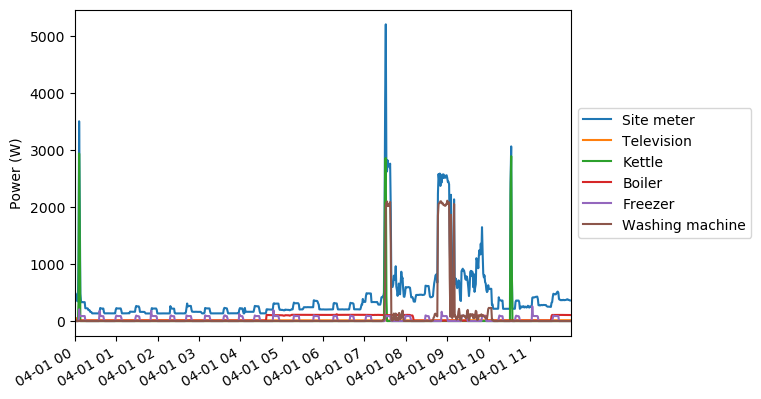

In [16]:
# Specify time window
ukdale.set_window(start=ST_START,end=ST_END)

# Define object, change building number accordingly
house_sample = ukdale.buildings[4].elec

# Plot graph
ax = house_sample.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


6/6 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


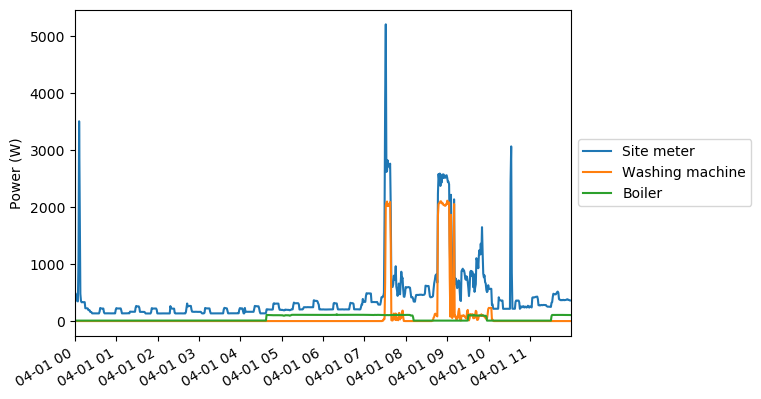

In [18]:
mains = house_sample.select_top_k(k=3)
#mains.plot

# Plot graph
ax = mains.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#the select_top_k method is called with k="1" to select the meter with the highest power consumption, 
#which is usually the mains. The plot method is then called on the resulting Electric object to plot the graph.

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


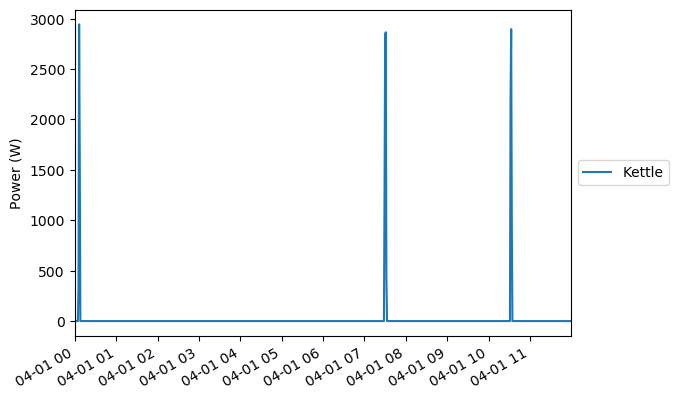

In [19]:
appliance = house_sample.select_using_appliances(type='kettle')
ax = appliance.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

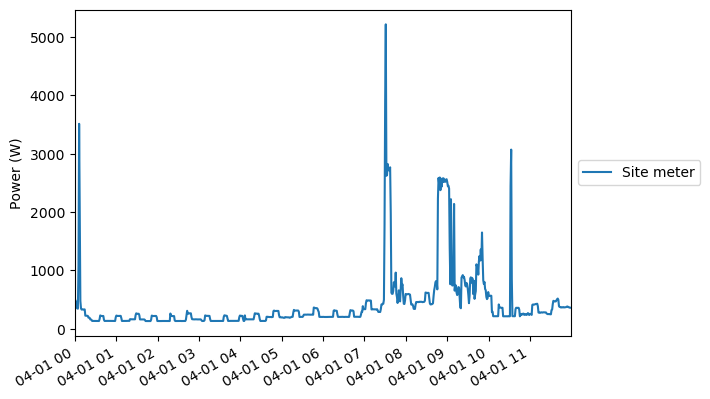

In [20]:
sitemeter = house_sample.mains()
ax = sitemeter.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [21]:
house_sample.mains()

ElecMeter(instance=1, building=4, dataset='UK-DALE', site_meter, appliances=[])

In [22]:
# total energy returns in kWh
house_sample.mains().total_energy()

apparent    5.003591
dtype: float64

In [23]:
house_sample.available_ac_types('power')

['active', 'apparent']

In [24]:
house_sample.mains().available_ac_types('power')

['apparent']

In [25]:
# Load 'site_meter' (aggregated data) to a dataframe
# Sample Period is in seconds. It can be resampling to a specified period, eg 12, 24, 30 or 60.
# Default sample rate is 6 second per log
###
# This allows to manipulate data to get futher statistics

mainsdf = next(house_sample.load(sample_period=30))
mainsdf.head()



Loading data for meter ElecMeterID(instance=6, building=4, dataset='UK-DALE')     
Done loading data all meters for this chunk.


physical_quantity              power            
type                          active    apparent
2013-04-01 00:00:00+01:00  60.000000  433.600006
2013-04-01 00:00:30+01:00  60.250000  625.000000
2013-04-01 00:01:00+01:00  60.200001  476.799988
2013-04-01 00:01:30+01:00  60.400002  482.000000
2013-04-01 00:02:00+01:00  60.000000  482.600006

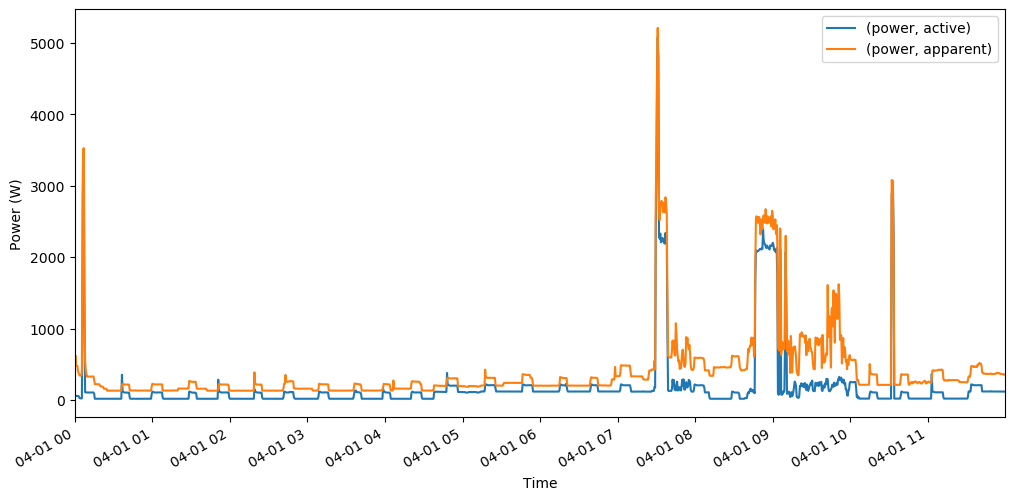

In [26]:
# plot mainsdf
ax = mainsdf.plot(figsize=(12,6))
ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.legend()
plt.show()

In [27]:
mainsdf.describe()

physical_quantity        power             
type                    active     apparent
count              1440.000000  1440.000000
mean                196.396591   417.565796
std                 489.546997   545.723206
min                  20.250000   133.000000
25%                  21.000000   163.800003
50%                 109.600006   241.599998
75%                 123.000000   417.750008
max                5076.800293  5210.200195

In [28]:
#Renaming and correcting the column names in this df

df_mains = mainsdf.copy()

df_mains.columns = ["_".join(pair) for pair in df_mains.columns]

df_mains = df_mains.rename(columns={"power_apparent":"power_apparent"})
df_mains = df_mains.rename(columns={"_active":"power_active"})

df_mains.describe()

power_active  power_apparent
count   1440.000000     1440.000000
mean     196.396591      417.565796
std      489.546997      545.723206
min       20.250000      133.000000
25%       21.000000      163.800003
50%      109.600006      241.599998
75%      123.000000      417.750008
max     5076.800293     5210.200195

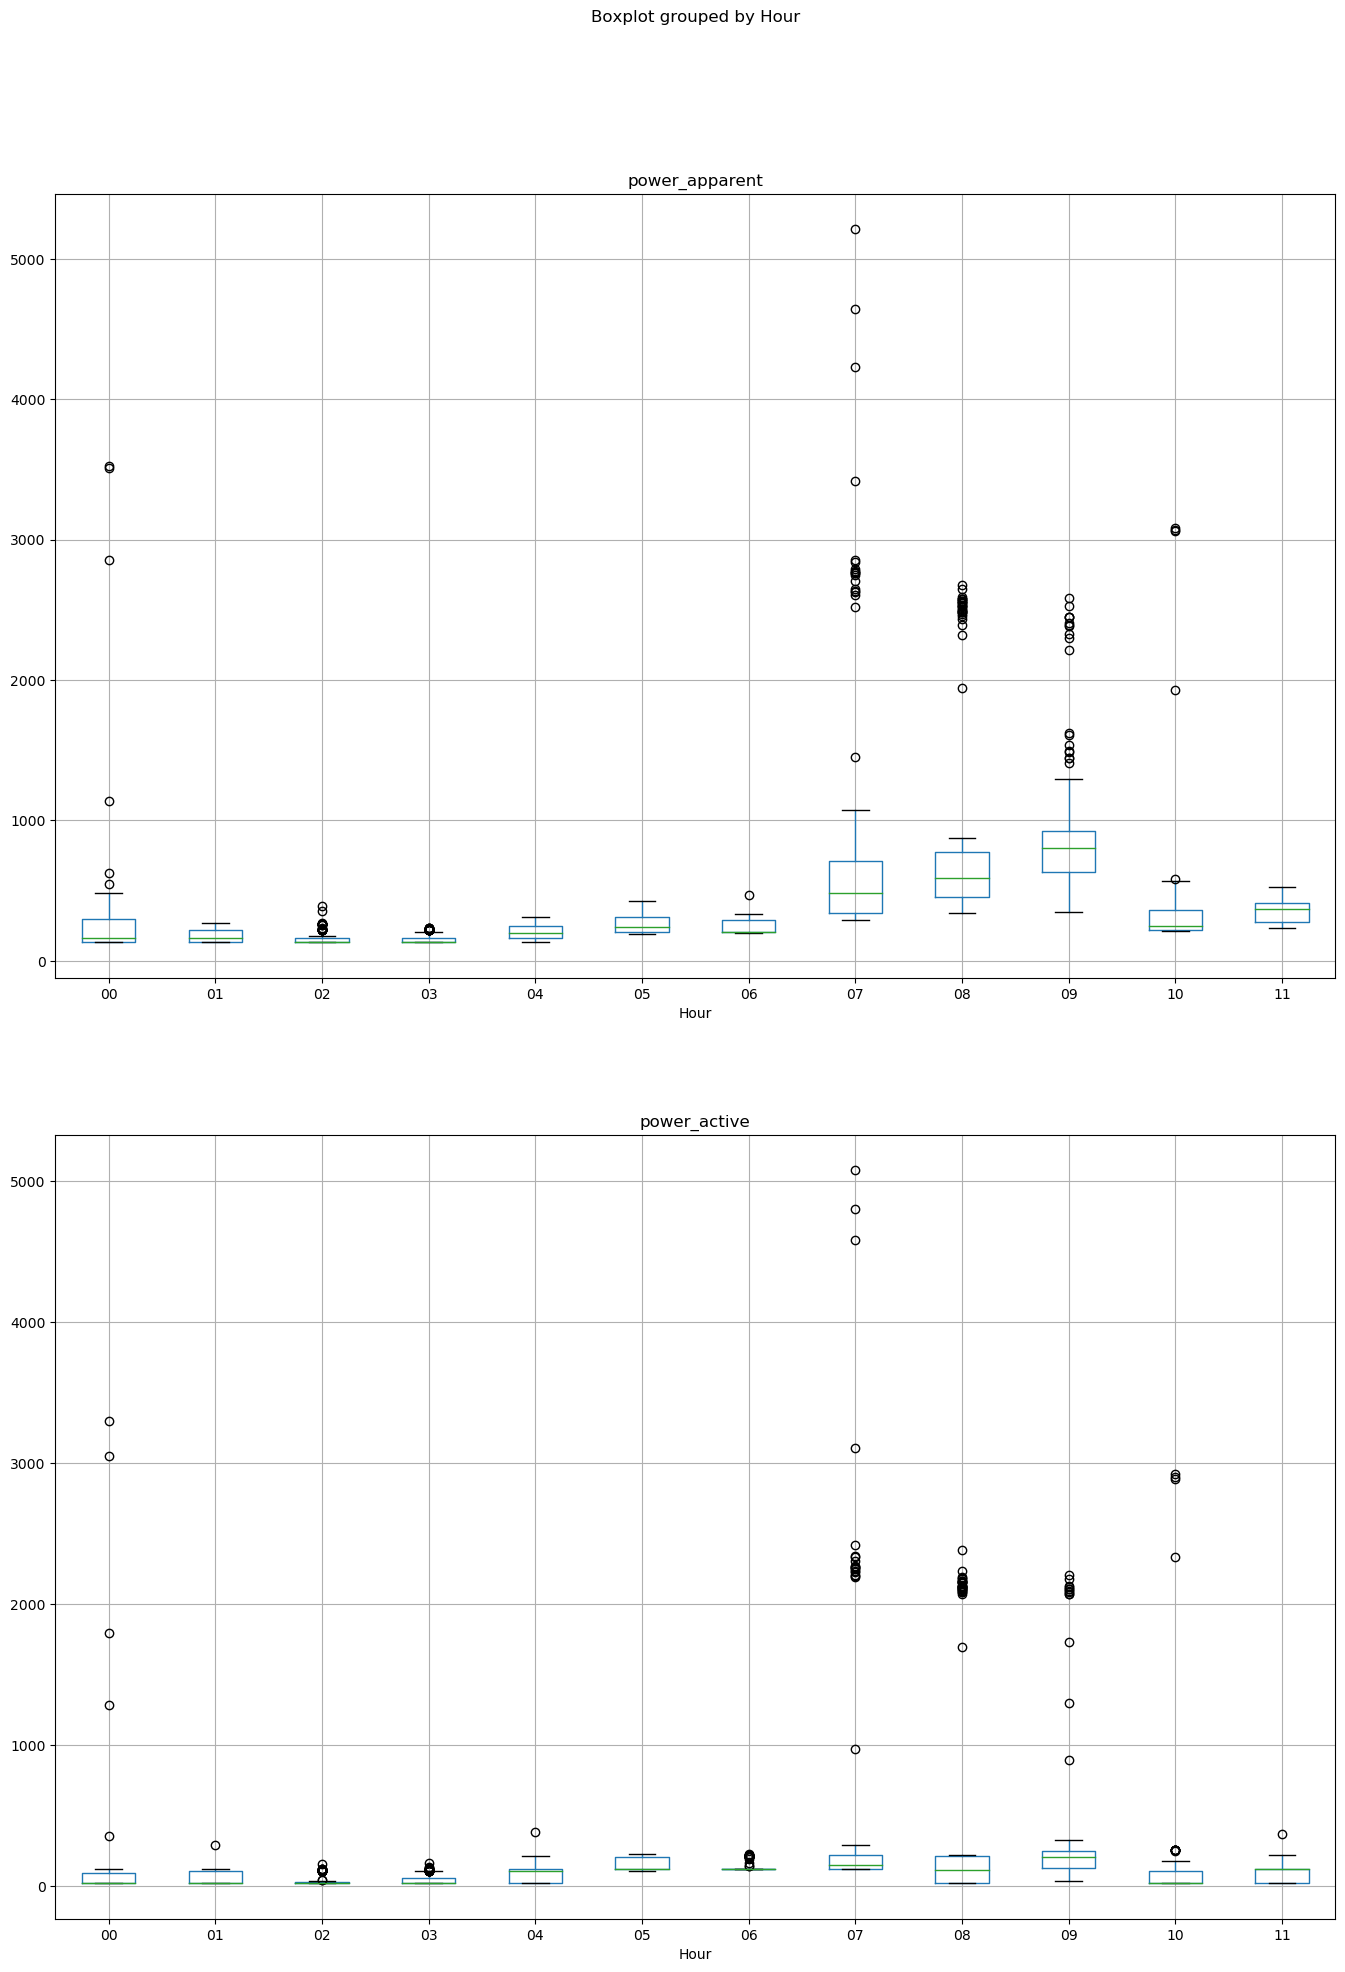

In [29]:
#Analysis mains Hourly with Boxplot

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 23))

plot_df_bp = df_mains.copy()

plot_df_bp['Hour'] = plot_df_bp.index.strftime('%H')
plot_df_bp = plot_df_bp.set_index('Hour')

plot_df_bp.boxplot(by='Hour', column=['power_apparent'], ax = axes[0])
plot_df_bp.boxplot(by='Hour', column=['power_active'], ax = axes[1])


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F685999A0>,
      dtype=object)

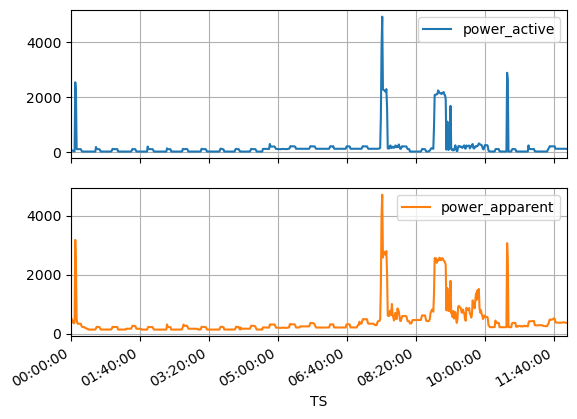

In [30]:
#Resample to Minute & Plot

# Duplicate dataframe for plotting
plot_df_resample = df_mains.resample('1min').mean()

# Handling xtickslabel datetime format
plot_df_resample["TS"] = plot_df_resample.index.strftime('%H:%M:%S')
plot_df_resample = plot_df_resample.set_index('TS')

plot_df_resample.plot(subplots=True, x_compat=True, grid=True)

###
#the code creates a new column in plot_df_resample called "TS" which contains 
#the time information for each row. The strftime() method is used to format 
#the time as "%H:%M:%S" (hours:minutes:seconds) and set it as the index of the dataframe.


In [31]:
## Creating a dataframe for a specific appliance

appliancedf = next(house_sample['kettle'].load())
appliancedf.head()

physical_quantity          power
type                      active
2013-04-01 00:00:05+01:00    0.0
2013-04-01 00:00:11+01:00    0.0
2013-04-01 00:00:17+01:00    0.0
2013-04-01 00:00:23+01:00    0.0
2013-04-01 00:00:30+01:00    0.0

In [32]:
obj = house_sample['kettle']
obj.available_columns()

[('power', 'active')]

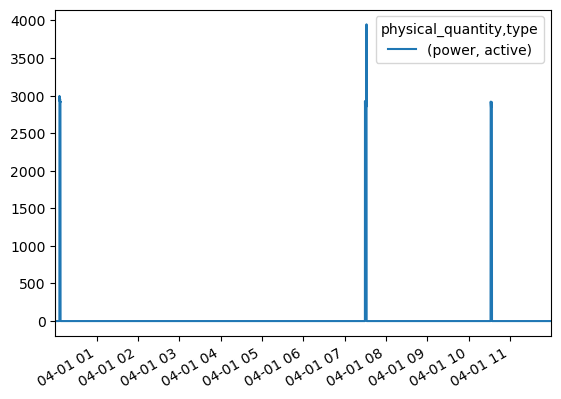

In [33]:
appliancedf.plot()

In [34]:
appliancedf.describe()

physical_quantity        power
type                    active
count              7042.000000
mean                 23.516756
std                 260.679291
min                   0.000000
25%                   0.000000
50%                   0.000000
75%                   0.000000
max                3948.000000

In [35]:
# Energy use per submeter

house_sample.submeters().energy_per_meter()

###
#The first line indicates that there are five submeters belonging 
#to ElecMeter instance 6, which is part of building 4 of the UK-DALE dataset. 

5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

(2, 4, UK-DALE)  (3, 4, UK-DALE)  (4, 4, UK-DALE)  (5, 4, UK-DALE)  \
active           0.165139         0.274928         0.536349         0.305463   
apparent              NaN              NaN              NaN              NaN   
reactive              NaN              NaN              NaN              NaN   

          (6, 4, UK-DALE)  
active           1.073009  
apparent              NaN  
reactive              NaN

In [36]:
house_sample.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=4, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1), Appliance(type='DVD player', instance=1), Appliance(type='set top box', instance=1), Appliance(type='light', instance=1)])
  ElecMeter(instance=3, building=4, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='radio', instance=1)])
  ElecMeter(instance=4, building=4, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=4, dataset='UK-DALE', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])
)

In [37]:
# Calculating the fraction of energy per appliance

fraction = house_sample.submeters().fraction_per_meter().dropna()

###
#The code computes the fraction of energy consumed by each submeter appliance in the 
#given house_sample dataset. It does this by calling the submeters() method on 
#the house_sample object to obtain a subset of the meters that are submeters (i.e., not the mains), 
#and then calling the fraction_per_meter() method on this subset. This method returns 
#a pandas dataframe with the fraction of energy consumed by each submeter appliance. 
#The resulting dataframe is stored in the fraction variable.

#The dropna() method is then called on the dataframe to remove any rows that 
#have missing values (i.e., submeters that did not consume any energy during the given time period).

5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


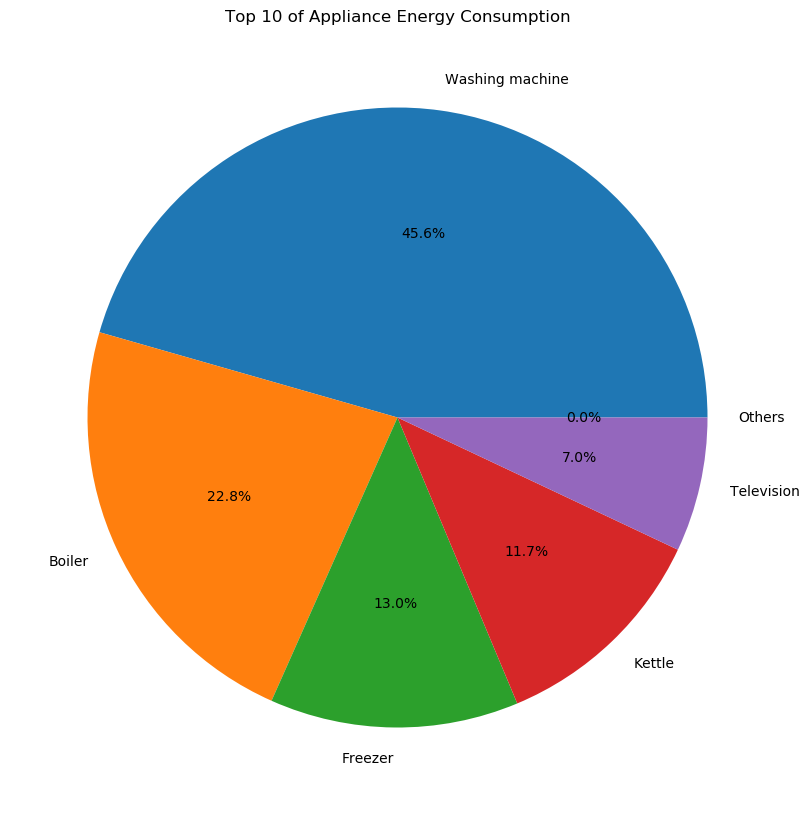

In [38]:
# Sorting the value to descending order
fraction_sorted = fraction.sort_values(ascending=False)

# Create series object for the top 10 appliance
fraction_top = fraction_sorted.head(10)

# Sum up the Other appliance value
others_val = 1 - fraction_top.sum()
fraction_top

# Create Pie Chart

labels = house_sample.get_labels(fraction_top.index)
labels.append('Others')

fraction_top['Others'] = others_val
plt.figure(figsize=(10,30))
fraction_top.plot(kind='pie', labels=labels, 
                  title="Top 10 of Appliance Energy Consumption", 
                  autopct='%1.1f%%', label="");

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


(<networkx.classes.digraph.DiGraph at 0x22f68cb0700>,
 <matplotlib.axes._axes.Axes at 0x22f68ca3a90>)

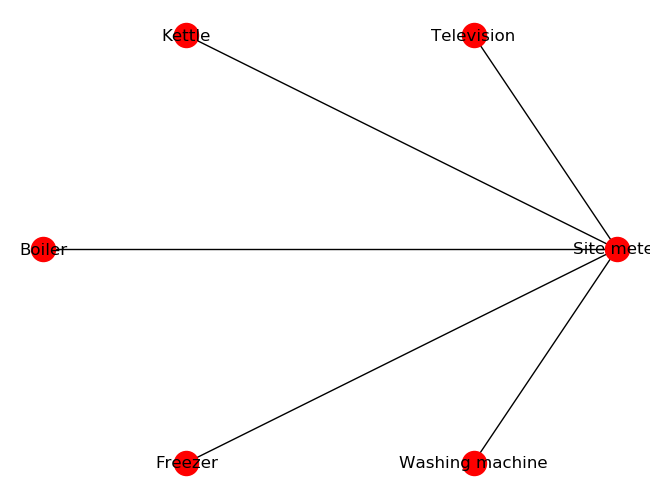

In [39]:
# Plot the wiring diagram
house_sample.draw_wiring_graph()

###
#The code is creating a wiring diagram for the selected building (i.e., house_sample). 
#The wiring diagram will show how the different appliances are connected to the electrical mains, indicating the flow of electricity throughout the building.

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


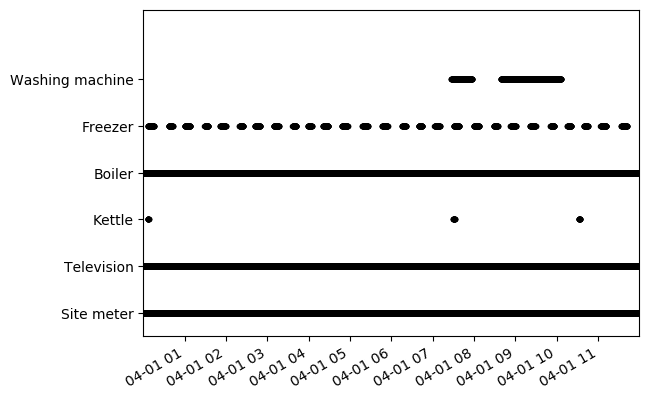

In [40]:
house_sample.plot_when_on(on_power_threshold = 5)

###
#The code house_data.plot_when_on(on_power_threshold = 5) is a function in the NILMTK 
#library used to plot the on/off status of appliances.
#The on_power_threshold parameter specifies the minimum power threshold in 
#watts to consider an appliance as being "on". Any readings below this threshold are considered "off".

###
#From UK dale paper
#Typical on_power_threshold 5 watts.

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\metergroup.py:939: UserWarning: As a quick implementation we only get Good Sections from the first meter in the meter group.  We should really return the intersection of the good sections for all meters.  This will be fixed...
  warnings.warn("As a quick implementation we only get Good Sections from"


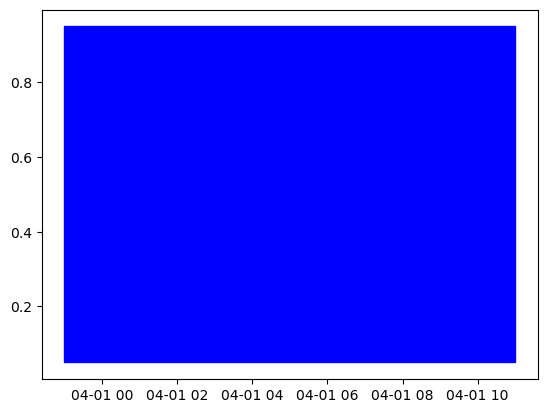

In [41]:
good_sections = house_sample.good_sections()
good_sections.plot()

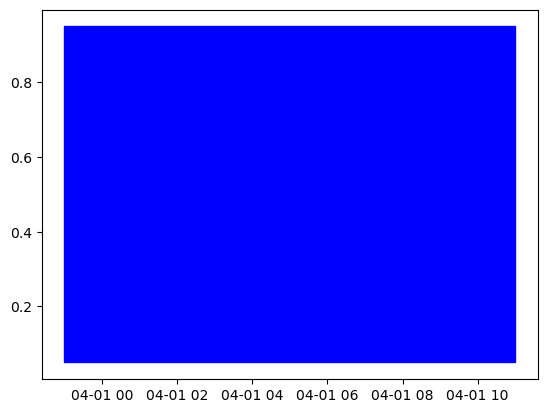

In [42]:
# Define a function to extract good sections for an appliance
kettle = house_sample['kettle']
good_sections = kettle.good_sections(full_results=True)

# specifying full_results=False would give us a simple list of 
# TimeFrames.  But we want the full GoodSectionsResults object so we can
# plot the good sections...

good_sections.plot()

In [43]:
## Get top 'k' appliances and plot

top_3_house_data = house_sample.submeters().select_top_k(k=3)

# Load data to dataframe from MeterGroup
raw_df_appliances_top3 = top_3_house_data.dataframe_of_meters()

print("\nIs there any null value in dataframe = {}.\n".format(raw_df_appliances_top3.isnull().values.any()))

# Change readable column name
raw_df_appliances_top3.columns = house_sample.get_labels(raw_df_appliances_top3.columns)

# Show dataframe info for MeterGroup
raw_df_appliances_top3.describe()



5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])
Is there any null value in dataframe = False.



C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


Washing machine       Boiler      Freezer
count      7200.000000  7200.000000  7200.000000
mean         89.478889    44.703335    25.405069
std         395.286377    47.681843    55.422287
min           0.000000     7.000000     0.000000
25%           0.000000     8.000000     0.000000
50%           0.000000     8.000000     0.000000
75%           0.000000   107.000000    86.000000
max        3171.000000   217.000000  1379.000000

In [44]:
#Check whether any missing data and Fix
raw_df_appliances_top3[raw_df_appliances_top3.isnull().any(axis=1)]

#no missing values

Empty DataFrame
Columns: [Washing machine, Boiler, Freezer]
Index: []

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022F6836EAF0>,
      dtype=object)

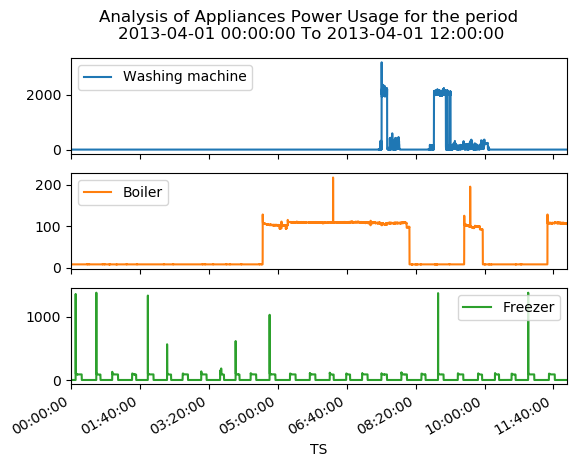

In [45]:
# Make a copy of dataframe and materialize for plotting

plot_top3_df = raw_df_appliances_top3.copy()

plot_top3_df["TS"] = plot_top3_df.index.strftime('%H:%M:%S')

plot_top3_df = plot_top3_df.set_index('TS')

mytitle = "Analysis of Appliances Power Usage for the period \n" + ST_PERIOD
plot_top3_df.plot(title=mytitle, subplots=True)

### Infomation of all buildings

In [46]:
for item in ukdale.buildings:
    rec = ukdale.buildings[item].elec
    print("buidling no = {}.".format(item))
    print(rec.get_timeframe())
    print("Sample Period = {}.".format(rec.sample_period()))
    print("Appliances = {}.".format(len(rec.appliances)))
    print("\n")
    
#For each building, the code selects the electricity consumption data for that 
#building by accessing the elec attribute of the Building object. The resulting 
#MeterGroup object, which represents the electricity consumption data for all 
#the meters in the building, is stored in the variable rec.

#The code then prints out some basic information about the electricity 
#consumption data for the building.

buidling no = 1.
TimeFrame(start='2013-04-01 00:00:00+01:00', end='2013-04-01 12:00:00+01:00', empty=False)
Sample Period = 6.
Appliances = 72.


buidling no = 2.
TimeFrame(start='2013-04-01 00:00:00+01:00', end='2013-04-01 12:00:00+01:00', empty=False)
Sample Period = 6.
Appliances = 18.


buidling no = 3.
TimeFrame(start='2013-04-01 00:00:00+01:00', end='2013-04-01 12:00:00+01:00', empty=False)
Sample Period = 6.
Appliances = 4.


buidling no = 4.
TimeFrame(start='2013-04-01 00:00:00+01:00', end='2013-04-01 12:00:00+01:00', empty=False)
Sample Period = 6.
Appliances = 11.


buidling no = 5.
TimeFrame(start='None', end='None', empty=True)
Sample Period = 6.
Appliances = 24.




## UK-DALE Paper Plot examples

plotting appliance power histograms...


C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


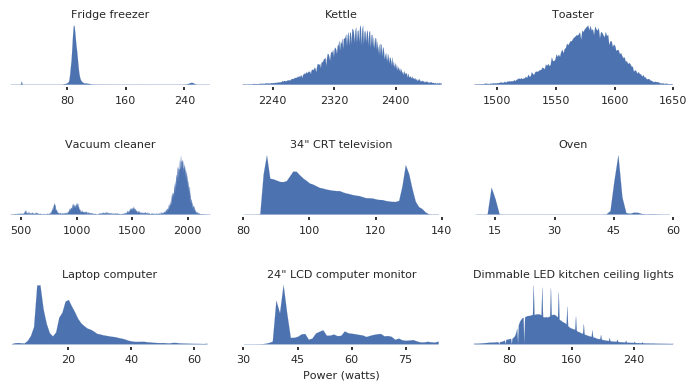

In [47]:
###Appliance Power Histograms
#Followed example by JackKelly UK-DALE Github

from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
import pytz
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(180, 100)})

print("plotting appliance power histograms...")

dataset = DataSet('./Dataset/ukdale.h5')
dataset.set_window("2013-04-26", None) # ignore tungsten kitchen lamps
elec = dataset.buildings[1].elec

fig, axes = plt.subplots(3, 3)
meter_keys = ['fridge freezer', 'kettle', 'toaster', 
              'vacuum cleaner', 'television', 'oven',
              'laptop computer', 'computer monitor', ('light', 1)]
kwargs_per_meter = {'range': [(  2,  275), (2200, 2460), (1480, 1650), 
                              ( 400, 2200), (  80,  140), (None,   60),
                              (   2,   65), (  30,   85), (35, 290)]}

axes = elec.plot_multiple(axes, meter_keys, 'plot_power_histogram', 
                          kwargs_per_meter, 
                          plot_kwargs={'color': plot_config.BLUE})

# Formatting
for i, ax in enumerate(axes):
    ax.grid(False)
    ax.set_yticks([])
    ax.set_ylabel('')
    plot_config.format_axes(ax, tick_size=2)
    ax.xaxis.set_ticks_position('bottom')
    ax.xaxis.set_major_locator(MaxNLocator(4))
    for spine in ax.spines.values():
        spine.set_visible(False)
    if i == 7:
        ax.set_xlabel('Power (watts)')
    else:
        ax.set_xlabel('')
    
    title = ax.get_title()
    if title in plot_config.new_names:
        title = plot_config.new_names[title]
    ax.set_title(title, y=0.95)

plt.tight_layout()
plt.subplots_adjust(hspace=1.0)

plt.draw()

###
#update Carlos
#removed the line for automatic saving plt.savefig
#plot_config file needs to be in the same library is py file that also contains editions.
#plot_config file was updated too, details in the file itself.



In [10]:
!pip install seaborn

                                              0.0/293.3 kB ? eta -:--:--
     -                                        10.2/293.3 kB ? eta -:--:--
     ---                                   30.7/293.3 kB 325.1 kB/s eta 0:00:01
     ---------                             71.7/293.3 kB 558.5 kB/s eta 0:00:01
     -------------------------------------  286.7/293.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00


Loading data for meter ElecMeterID(instance=53, building=1, dataset='UK-DALE')     
Done loading data all meters for this chunk.


C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.


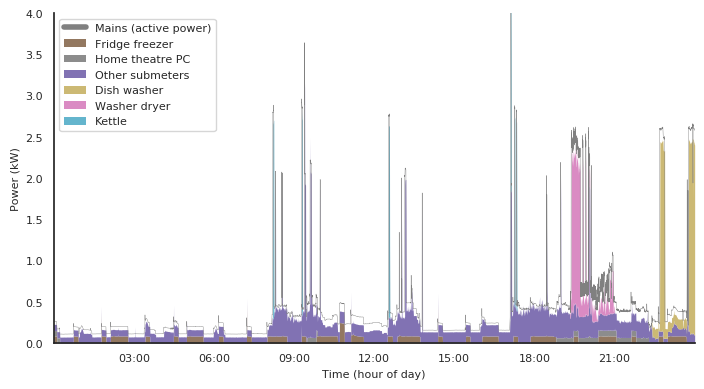

In [11]:
###Area plots

from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
from datetime import timedelta
import matplotlib.pyplot as plt
import pytz
import pandas as pd
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(180, 100)})

UNIT = 'kW'

dataset = DataSet('./Dataset/ukdale.h5')
TZ_STRING = dataset.metadata['timezone']
TZ = pytz.timezone(TZ_STRING)
elec = dataset.buildings[1].elec
submeters = elec.meters_directly_downstream_of_mains()

# Select appliances used in top K plot
APPLIANCES = ['fridge freezer', 'HTPC', 'dish washer', 'washer dryer', 'kettle']
selected_meters = [submeters[appliance] for appliance in APPLIANCES]
remainder = []
for meter in submeters.meters:
    for appliance in APPLIANCES:
        if meter.matches_appliances({'type': appliance}):
            break
    else:
        remainder.append(meter)

remainder = MeterGroup(remainder)
remainder.name = 'Other submeters'
selected_meters = MeterGroup(selected_meters[:2] + [remainder] + selected_meters[2:])
selected_meters['HTPC'].name = 'Home theatre PC'

# Reverse the colour palette so it matches top_5_energy
colors = sns.color_palette('deep')
colors.reverse()
colors = [colors[i] for i in [4, 2, 5, 1, 3, 0]]
sns.set_palette(colors)

# Set window
DATE = "2014-12-07"
next_day = pd.Timestamp(DATE) + timedelta(days=1)
dataset.set_window(DATE, next_day)

# Plot area
# Need to use a linewidth of 0 to prevent nasty things appearing
# in output.  Looks bad in plt.show() though!
ax, df = selected_meters.plot(kind='area', unit=UNIT, width=4000, threshold=5,
                              plot_kwargs={'linewidth': 0})

# Plot mains
ax = elec.mains().plot(ax=ax, unit=UNIT, width=10000,
                       plot_kwargs={'linewidth': 0.3, 'color': 'grey',
                                    'label': 'Mains (active power)'})

# Prettify
ax.grid(False)
ax.set_ylim([0, 4])
ax.set_xlabel('Time (hour of day)')
ax.xaxis.set_major_formatter(DateFormatter("%H", tz=TZ))
ax.xaxis.set_major_locator(HourLocator(interval=6, tz=TZ))
for text in ax.get_xticklabels():
    text.set_rotation(0)
    text.set_ha('center')
sns.despine(ax=ax)
legend = ax.legend(loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(4)

plot_config.format_axes(ax)
plt.tight_layout()

plt.draw()

plotting histograms...


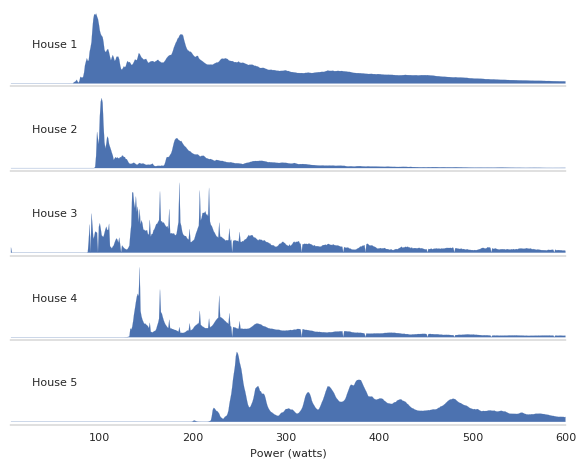

In [49]:
###Mains power activity histograms

from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
import matplotlib.pyplot as plt
import pytz
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(150, 120)})

print("plotting histograms...")

dataset = DataSet('./Dataset/ukdale.h5')
#dataset.set_window("2013-04-01", "2013-05-01")
    # In this period, no data is available for house 5s

dataset.set_window(None, None)

axes = dataset.plot_mains_power_histograms(bins=600, range=(5, 600), 
                                           plot_kwargs={'color': plot_config.BLUE})

for i, ax in enumerate(axes):
    ax.grid(False)
    ax.set_yticks([])
    ax.set_ylabel("")
    plot_config.format_axes(ax, tick_size=2)
    sns.despine(ax=ax, left=True)
    ax.spines['bottom'].set_linewidth(0.2)    
    ax.set_title('House {}'.format(i+1), y=.5, va='top', x=0.08)
    if i != 4:
        ax.set_xlabel('')

plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

plt.draw()


plotting good sections...


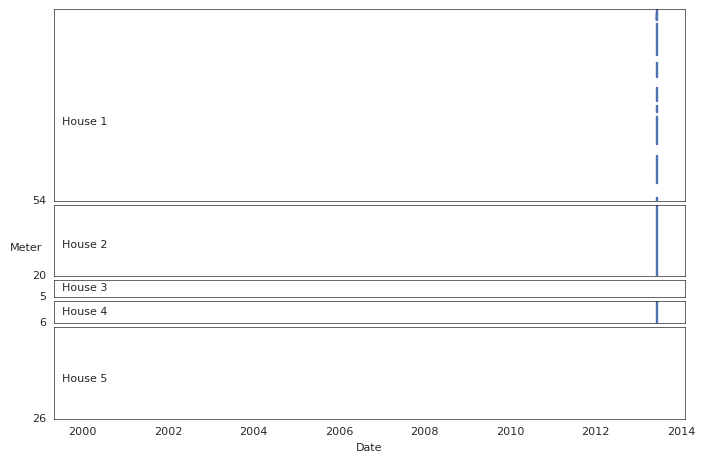

In [50]:
# Plot good sections 

from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
import matplotlib.pyplot as plt
import pytz
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(180, 120)})

print("plotting good sections...")

dataset = DataSet('./Dataset/ukdale.h5')
dataset.set_window("2013-06-01", "2013-06-02") 
# dataset.set_window(None, None) 

axes = dataset.plot_good_sections(color=plot_config.BLUE)

for i, ax in enumerate(axes):
    plot_config.format_axes(ax, tick_size=2)
    ax.set_title('House {:d}'.format(i+1), x=0.05, y=.4, va='top')    
    ax.set_ylabel('Meter' if i == 1 else '', 
                  rotation=0, ha='center', va='center', y=.4)

plt.show()

# Creating plots for EDA

In [51]:
#identifying which methods are available in the nilmtk

import nilmtk

# Loop through all the classes in the nilmtk package
for name, obj in vars(nilmtk).items():
    # Check if the object is a class
    if hasattr(obj, '__dict__'):
        # Print out the class name
        print(f"\nClass {name} has methods:")
        # Print out all the methods for the class
        print(obj.__dict__.keys())




Class __loader__ has methods:
dict_keys(['name', 'path'])

Class __spec__ has methods:
dict_keys(['name', 'loader', 'origin', 'loader_state', 'submodule_search_locations', '_set_fileattr', '_cached', '_initializing'])

Class warnings has methods:
dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__file__', '__cached__', '__builtins__', 'sys', '__all__', 'showwarning', 'formatwarning', '_showwarnmsg_impl', '_formatwarnmsg_impl', '_showwarning_orig', '_showwarnmsg', '_formatwarning_orig', '_formatwarnmsg', 'filterwarnings', 'simplefilter', '_add_filter', 'resetwarnings', '_OptionError', '_processoptions', '_setoption', '_getaction', '_getcategory', '_is_internal_frame', '_next_external_frame', 'warn', 'warn_explicit', 'WarningMessage', 'catch_warnings', '_warn_unawaited_coroutine', 'filters', '_defaultaction', '_onceregistry', '_filters_mutated', 'defaultaction', 'onceregistry'])

Class version has methods:
dict_keys(['__name__', '__doc__', '__package__', '__lo

In [3]:
import pandas as pd
from nilmtk import DataSet

information = DataSet('./Dataset/ukdale.h5')
information.set_window(None, None)

for item in information.buildings:
    rec = information.buildings[item].elec
    print("Building no = {}.".format(item))
    time_frame = rec.get_timeframe()
    start_time = time_frame.start
    end_time = time_frame.end
    elapsed_days = pd.to_timedelta(end_time - start_time).days
    print("Start Time = {}.".format(start_time))
    print("End Time = {}.".format(end_time))
    print("Elapsed Days = {}.".format(elapsed_days))
    print("Sample Period = {}.".format(rec.sample_period()))
    print("Appliances = {}.".format(len(rec.appliances)))
    print("\n")



Building no = 1.
Start Time = 2012-11-09 22:28:18+00:00.
End Time = 2017-04-26 18:35:58.500000+01:00.
Elapsed Days = 1628.
Sample Period = 6.
Appliances = 72.


Building no = 2.
Start Time = 2013-02-17 15:39:19+00:00.
End Time = 2013-10-10 06:16:00.500000+01:00.
Elapsed Days = 234.
Sample Period = 6.
Appliances = 18.


Building no = 3.
Start Time = 2013-02-27 20:35:14+00:00.
End Time = 2013-04-08 06:15:05+01:00.
Elapsed Days = 39.
Sample Period = 6.
Appliances = 4.


Building no = 4.
Start Time = 2013-03-09 14:40:07+00:00.
End Time = 2013-10-01 06:15:14+01:00.
Elapsed Days = 205.
Sample Period = 6.
Appliances = 11.


Building no = 5.
Start Time = 2014-06-29 17:23:43.200000+01:00.
End Time = 2014-11-13 20:35:25.100000+00:00.
Elapsed Days = 137.
Sample Period = 6.
Appliances = 24.




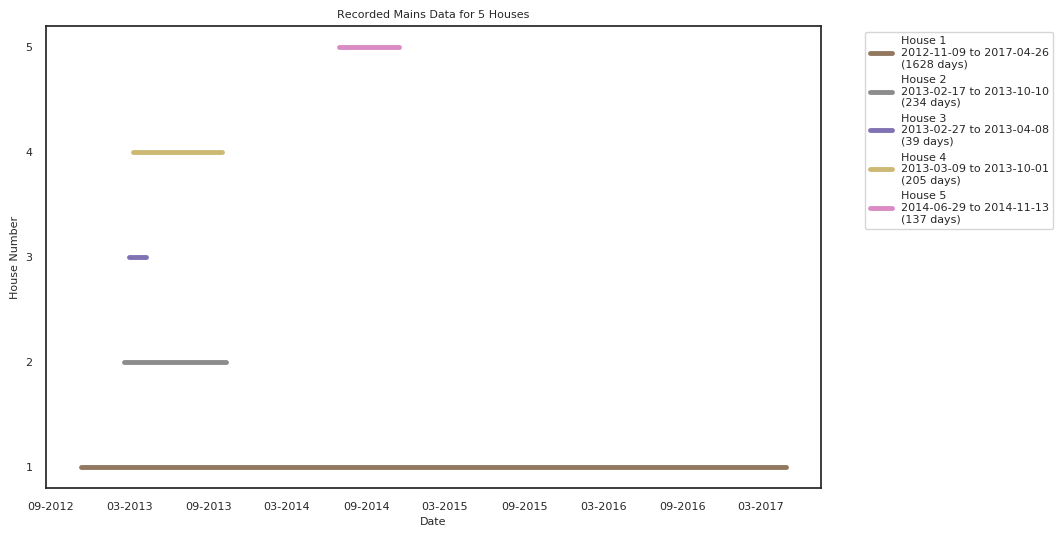

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator

information = DataSet('./Dataset/ukdale.h5')
information.set_window(None, None)

fig, ax = plt.subplots(figsize=(10,6))

for item in information.buildings:
    rec = information.buildings[item].elec
    start_time = rec.get_timeframe().start
    end_time = rec.get_timeframe().end
    elapsed_days = pd.to_timedelta(end_time - start_time).days
    label = 'House {}\n{} to {}\n({} days)'.format(item, start_time.date(), end_time.date(), elapsed_days)
    ax.plot([start_time, end_time], [item, item], label=label, linewidth=3.5)

date_form = DateFormatter("%m-%Y")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(MonthLocator(interval=6))

ax.set_xlabel('Date')
ax.set_ylabel('House Number')
ax.set_title('Recorded Mains Data for 5 Houses')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

ax.set_yticks(range(1, 6))
ax.set_yticklabels(range(1, 6))

plt.show()




### Analyzing each of the houses

### House 1

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


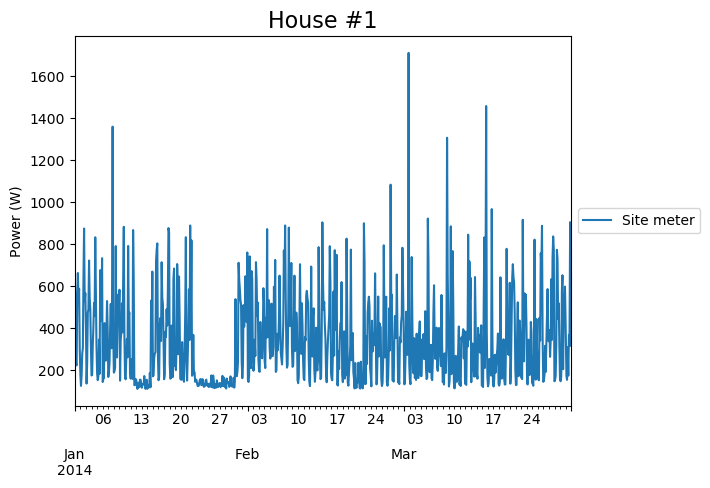

Loading data for meter ElecMeterID(instance=54, building=1, dataset='UK-DALE')      ElecMeterID(instance=21, building=1, dataset='UK-DALE')      ElecMeterID(instance=31, building=1, dataset='UK-DALE')     

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")



Done loading data all meters for this chunk.


voltage         active       apparent
count  127747.000000  127749.000000  127749.000000
mean      243.325123     470.591888     561.859375
std         1.673617     488.654938     835.216187
min       233.029495      63.000000     110.647888
25%       242.309830     220.196167     191.245789
50%       243.466660     315.489990     348.275848
75%       244.509827     540.311340     580.859131
max       250.940506    6142.295410   11610.731445

In [127]:
#Creating DF on mains for each house

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-01-01", "2014-03-31")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

#test plot
mains_1 = house_1.mains()
ax = mains_1.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('House #1', fontsize=16)
plt.show()

#Check column names
#print(mainsdf_1.columns)

#Passing data to a dataframe and renaming columns
mainsdf_1 = next(house_1.load(sample_period=60))
mainsdf_1.columns = ['voltage', 'active', 'apparent']
#mainsdf_1.head()


mainsdf_1.describe()



In [128]:
mainsdf_1.head()

voltage      active    apparent
2014-01-01 00:00:00+00:00  244.534500  589.485657  779.520264
2014-01-01 00:01:00+00:00  244.333664  644.325500  947.669556
2014-01-01 00:02:00+00:00  244.769669  633.299866  925.645508
2014-01-01 00:03:00+00:00  244.887161  630.956360  919.537476
2014-01-01 00:04:00+00:00  244.874664  643.085510  948.833496

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5D763AF40>,
      dtype=object)

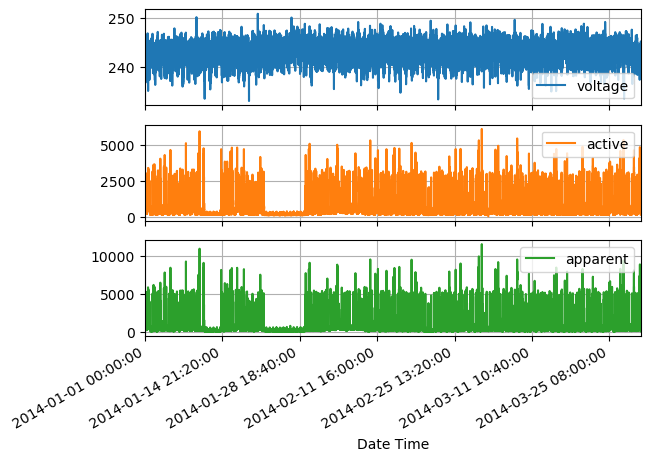

In [134]:
# plotting mains data

#resample if needed
#plot_df= df_mains_1.resample('1min').mean()

#Creating copy of the dataframe
plot_df = mainsdf_1.copy()

# Handling xtickslabel datetime format
plot_df["Date Time"] = plot_df.index.strftime('%Y-%m-%d %H:%M:%S')
plot_df = plot_df.set_index('Date Time')

plot_df.plot(subplots=True, x_compat=True, grid=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F5E4277400>,
      dtype=object)

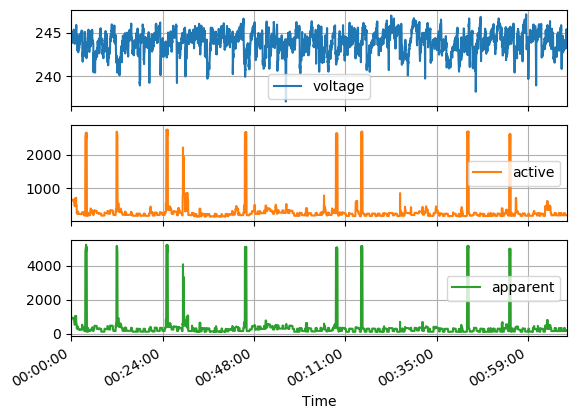

In [143]:
# plotting mains data

# resample if needed
# plot_df = df_mains_1.resample('1min').mean()

# create copy of the dataframe
plot_df = mainsdf_1.copy()

# set start and end time for x-axis
start_time = '00:00:00'
end_time = '01:00:00'

# select rows within the specified time range
plot_df = plot_df.between_time(start_time, end_time)

# format x-axis labels
plot_df["Time"] = plot_df.index.strftime('%H:%M:%S')
plot_df = plot_df.set_index('Time')

# plot data
plot_df.plot(subplots=True, x_compat=True, grid=True)


C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


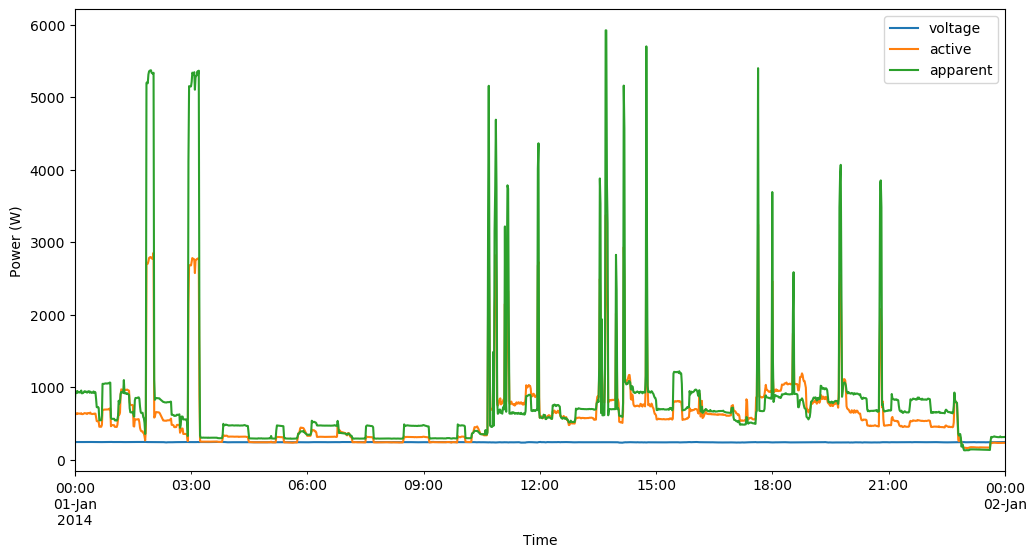

In [145]:
# plot mainsdf for a specific time frame
start_time = '2014-01-01 00:00:00'
end_time = '2014-01-02 00:00:00'

ax = mainsdf_1.loc[start_time:end_time].plot(figsize=(12,6))
ax.set_xlabel('Time')
ax.set_ylabel('Power (W)')
ax.legend()
plt.show()

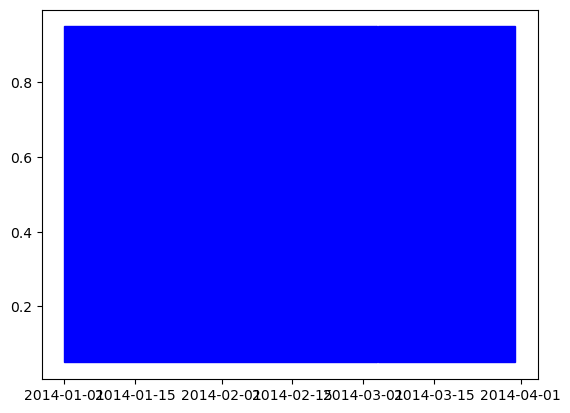

In [146]:
#Check dates in the first section of the code

good_sections_1 = mains_1.good_sections()
good_sections_1.plot()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


(<networkx.classes.digraph.DiGraph at 0x1f5da404310>,
 <matplotlib.axes._axes.Axes at 0x1f5da404ca0>)

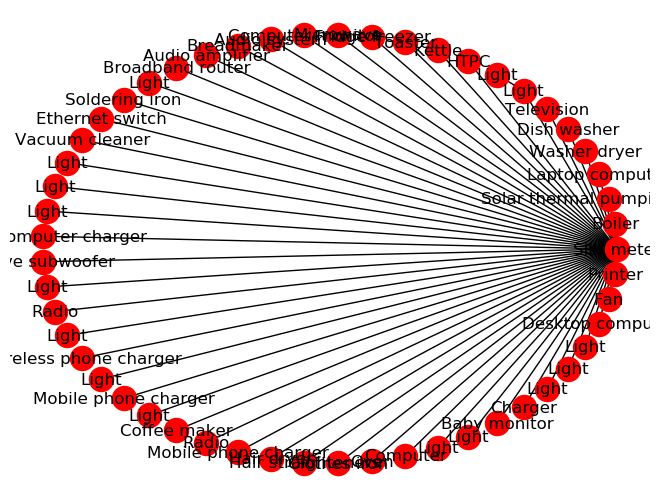

In [152]:
# Plot the wiring diagram
house_1.draw_wiring_graph()


In [153]:
#list of appliances
all_appliances_1 = house_1.appliances
all_appliance_labels_1 = [app.label() for app in all_appliances_1]
print(all_appliance_labels_1)

["('security alarm', 1)", "('television', 1)", "('hair dryer', 1)", "('coffee maker', 1)", "('laptop computer', 1)", "('fridge freezer', 1)", "('light', 2)", "('light', 8)", "('food processor', 1)", "('washer dryer', 2)", "('light', 5)", "('mobile phone charger', 2)", "('radio', 2)", "('light', 11)", "('light', 14)", "('desktop computer', 1)", "('immersion heater', 1)", "('HTPC', 1)", "('audio system', 1)", "('bouncy castle pump', 1)", "('wireless phone charger', 1)", "('water pump', 1)", "('baby monitor', 2)", "('broadband router', 2)", "('external hard disk', 1)", "('drill', 1)", "('USB hub', 1)", "('dish washer', 1)", "('printer', 1)", "('light', 1)", "('hair straighteners', 1)", "('breadmaker', 1)", "('washer dryer', 1)", "('vacuum cleaner', 1)", "('light', 4)", "('toaster', 1)", "('laptop computer', 3)", "('soldering iron', 1)", "('ethernet switch', 1)", "('light', 7)", "('mobile phone charger', 1)", "('light', 16)", "('radio', 1)", "('light', 10)", "('tablet computer charger', 1)

In [154]:
house_1.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=1, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=3, building=1, dataset='UK-DALE', appliances=[Appliance(type='solar thermal pumping station', instance=1)])
  ElecMeter(instance=4, building=1, dataset='UK-DALE', appliances=[Appliance(type='laptop computer', instance=1), Appliance(type='laptop computer', instance=3)])
  ElecMeter(instance=5, building=1, dataset='UK-DALE', appliances=[Appliance(type='washer dryer', instance=1), Appliance(type='washer dryer', instance=2)])
  ElecMeter(instance=6, building=1, dataset='UK-DALE', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=7, building=1, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1)])
  ElecMeter(instance=8, building=1, dataset='UK-DALE', appliances=[Appliance(type='light', instance=1), Appliance(type='light', instance=2)])
  ElecMeter(instance=9, building=1, dataset='UK-DALE', appliances

##### Appliances for training period: 1-Jan-2014 to 31-Mar-2014

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


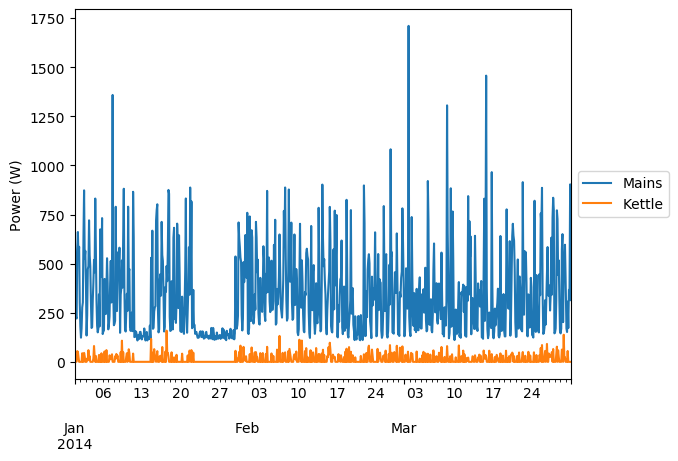

In [159]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
kettle = house_1.select_using_appliances(type='kettle')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
kettle.plot(ax=ax)
ax.legend(['Mains', 'Kettle'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


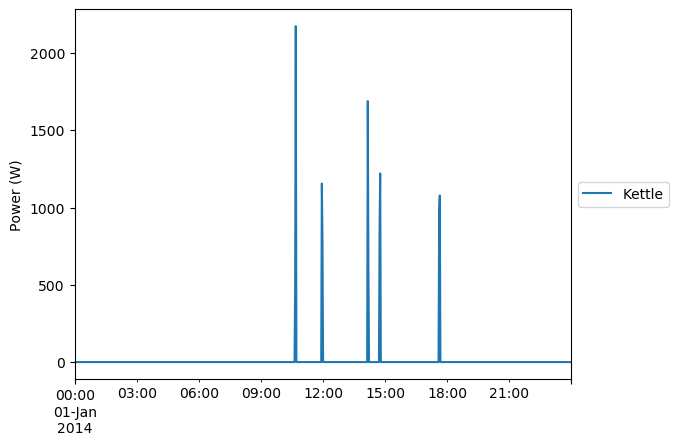

In [161]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-01-01", "2014-01-02")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

kettle = house_1.select_using_appliances(type='kettle')
ax = kettle.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


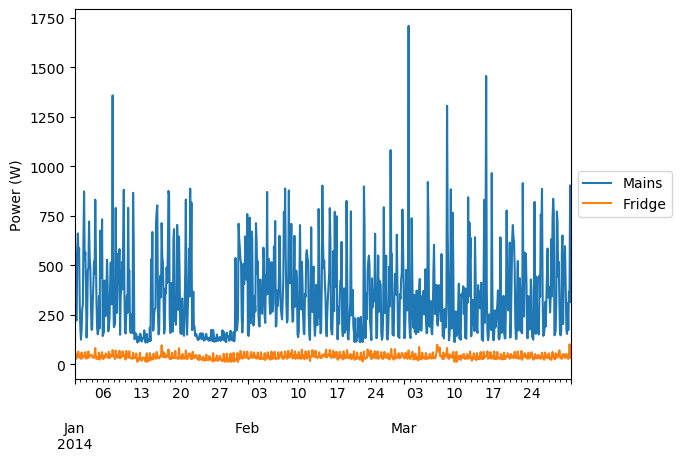

In [162]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
fridge = house_1.select_using_appliances(type='fridge freezer')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
fridge.plot(ax=ax)
ax.legend(['Mains', 'Fridge'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


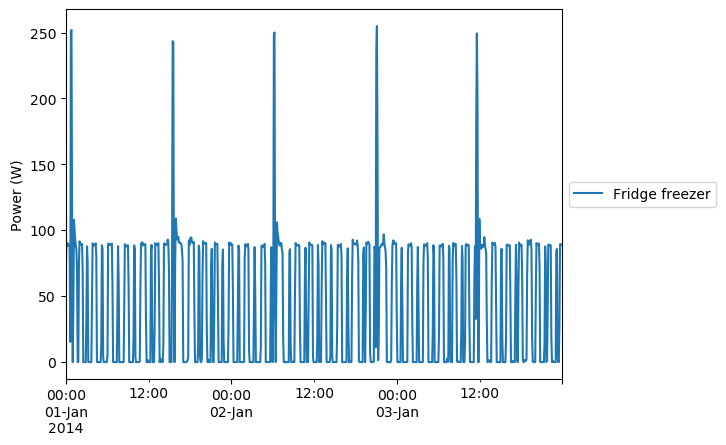

In [173]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-01-01", "2014-01-04")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

fridge = house_1.select_using_appliances(type='fridge freezer')
ax = fridge.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


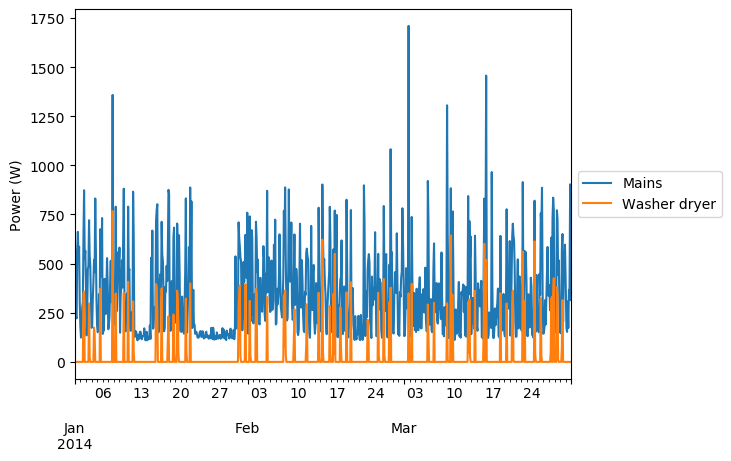

In [7]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
washing_machine = house_1.select_using_appliances(type='washer dryer',instance=1)
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
washing_machine.plot(ax=ax)
ax.legend(['Mains', 'Washer dryer'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#instance 1 and 2 are the same washing machine

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


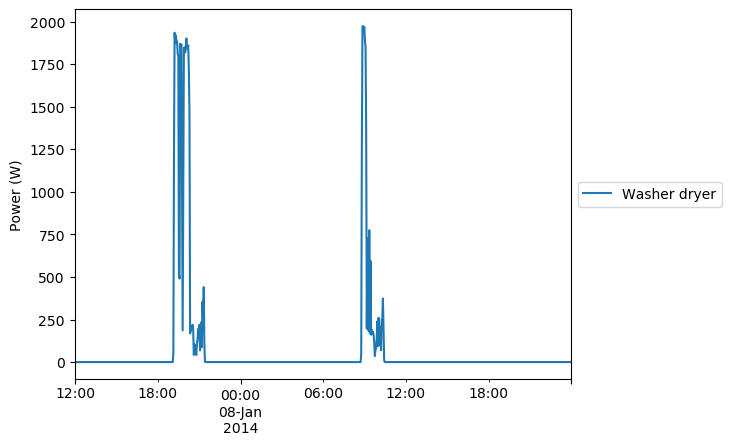

In [12]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-01-07 12:00:00", "2014-01-09 00:00:00")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

washing_machine = house_1.select_using_appliances(type='washer dryer',instance=1)
ax = washing_machine.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


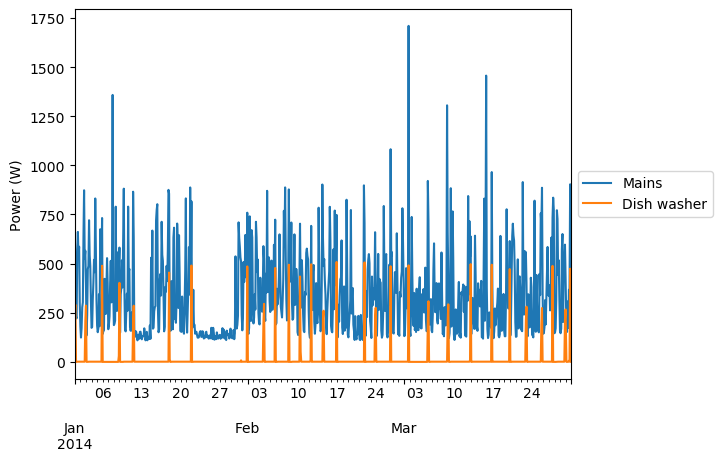

In [14]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
dish_washer = house_1.select_using_appliances(type='dish washer')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
dish_washer.plot(ax=ax)
ax.legend(['Mains', 'Dish washer'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


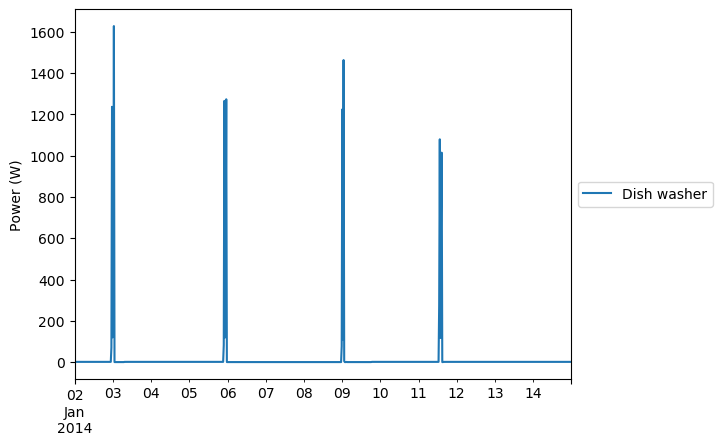

In [18]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-01-02", "2014-01-15")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

dish_washer = house_1.select_using_appliances(type='dish washer')
ax = dish_washer.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


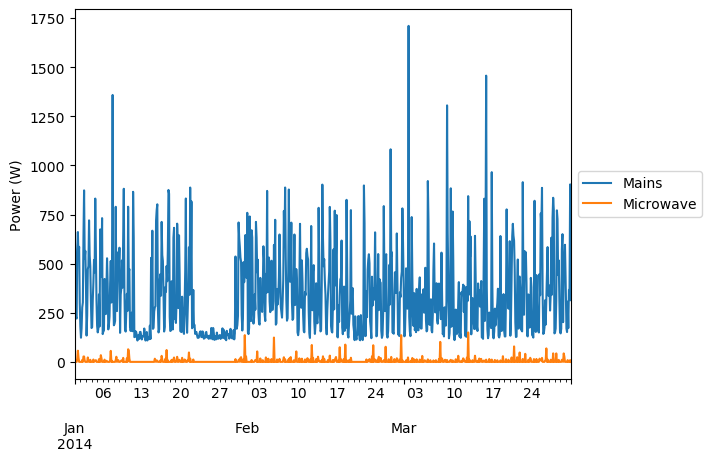

In [20]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
microwave = house_1.select_using_appliances(type='microwave')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
microwave.plot(ax=ax)
ax.legend(['Mains', 'Microwave'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:431: UserWarning: The provided sample_period (3) is shorter than the meter's sample_period (6)
  warn("The provided sample_period ({}) is shorter than the meter's sample_period ({})".format(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


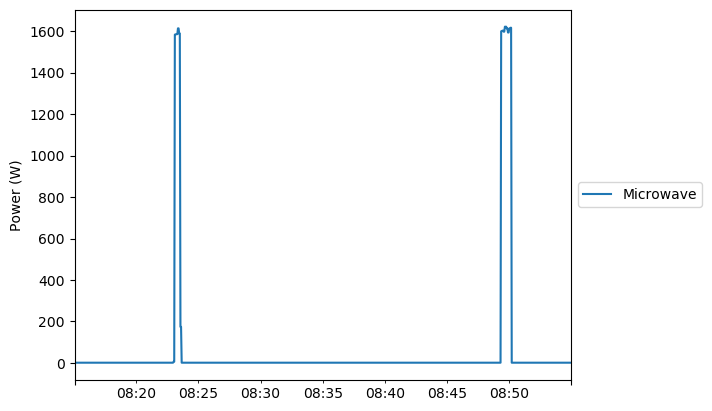

In [32]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-02-02 08:15:00", "2014-02-02 08:55:00")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

microwave = house_1.select_using_appliances(type='microwave')
ax = microwave.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


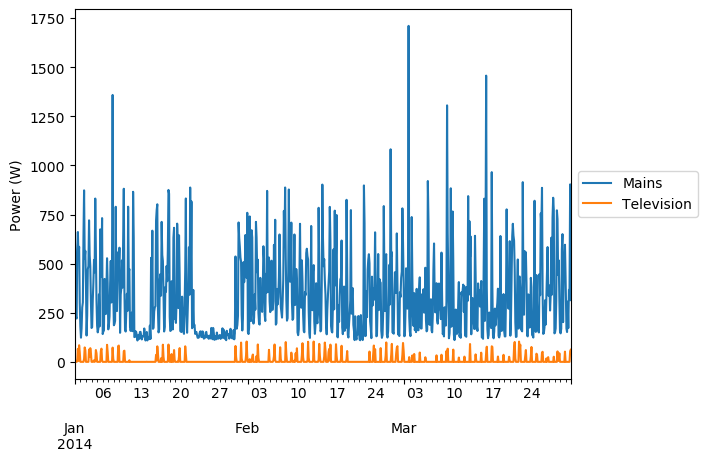

In [47]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-01-01", "2014-03-31")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
television = house_1.select_using_appliances(type='television')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
television.plot(ax=ax)
ax.legend(['Mains', 'Television'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


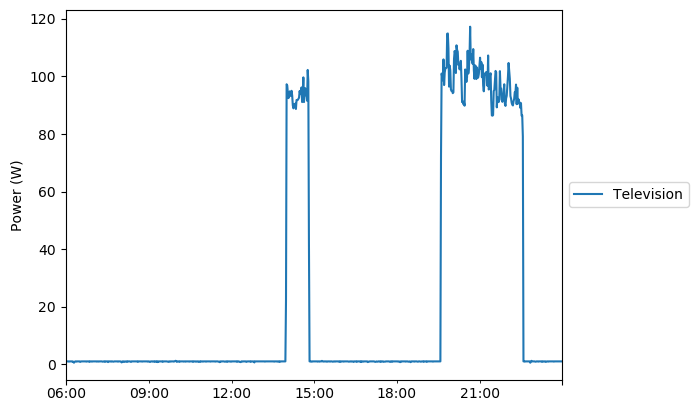

In [49]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2014-02-02 06:00:00", "2014-02-03")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

television = house_1.select_using_appliances(type='television')
ax = television.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# A 24-inch CRT TV consumes 75 – 95 watts of electricity per hour, 
# while an LED TV the same size will consume roughly just a third of 
# that energy amount. Stepping up to a 50-inch TV, 
# a plasma-screen TV consumes 150 – 200 watts. A similarly sized LED TV uses 50 – 60 watt

##### Appliances for test period: 1-May-2014 to 31-May-2014
use 05-11 may: from monday to sunday. dataset is complete for all may

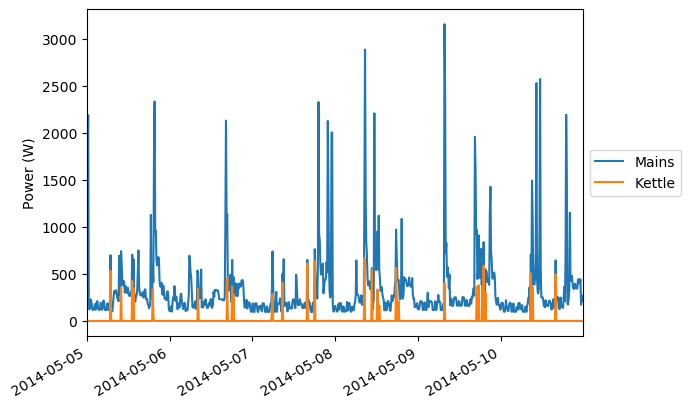

In [18]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-11")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
kettle = house_1.select_using_appliances(type='kettle')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
kettle.plot(ax=ax)
ax.legend(['Mains', 'Kettle'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

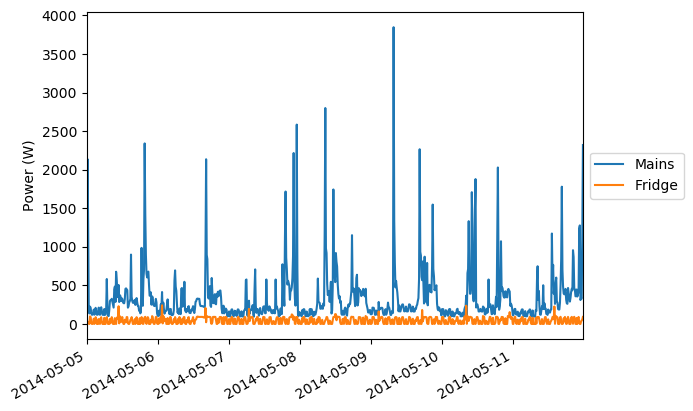

In [2]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-12")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
fridge = house_1.select_using_appliances(type='fridge freezer')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
fridge.plot(ax=ax)
ax.legend(['Mains', 'Fridge'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


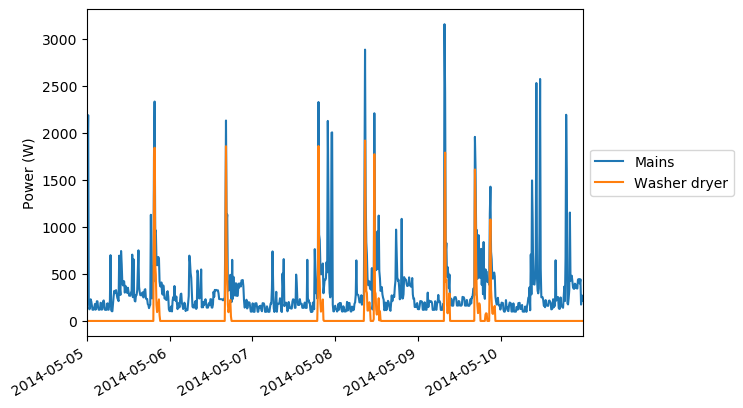

In [20]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-11")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
washing_machine = house_1.select_using_appliances(type='washer dryer',instance=1)
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
washing_machine.plot(ax=ax)
ax.legend(['Mains', 'Washer dryer'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

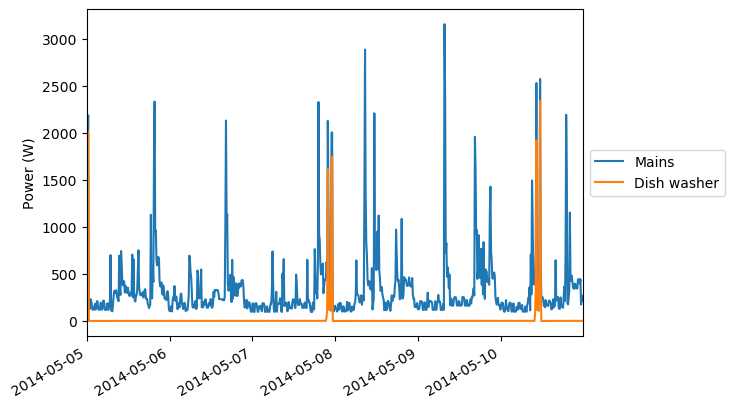

In [21]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-11")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
dish_washer = house_1.select_using_appliances(type='dish washer')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
dish_washer.plot(ax=ax)
ax.legend(['Mains', 'Dish washer'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

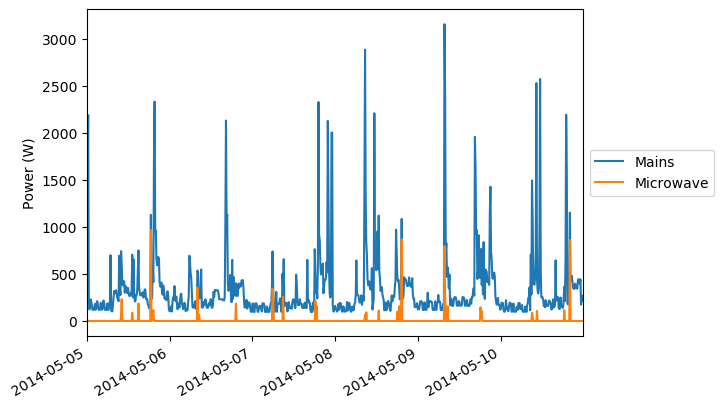

In [22]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-11")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
microwave = house_1.select_using_appliances(type='microwave')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
microwave.plot(ax=ax)
ax.legend(['Mains', 'Microwave'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

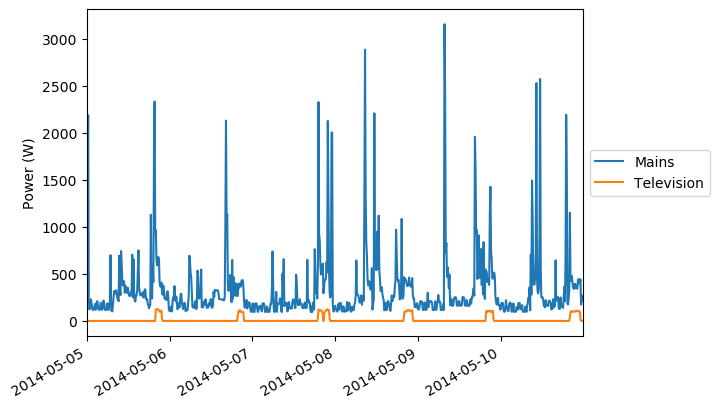

In [23]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-11")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
television = house_1.select_using_appliances(type='television')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
television.plot(ax=ax)
ax.legend(['Mains', 'Television'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

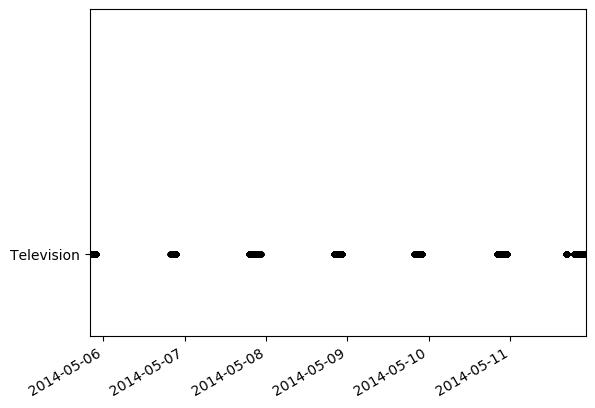

In [11]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05", "2014-05-12")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get kettle and mains appliances
television = house_1.select_using_appliances(type='television')

television.plot_when_on(on_power_threshold = 5)

#### Plot selected appliances

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


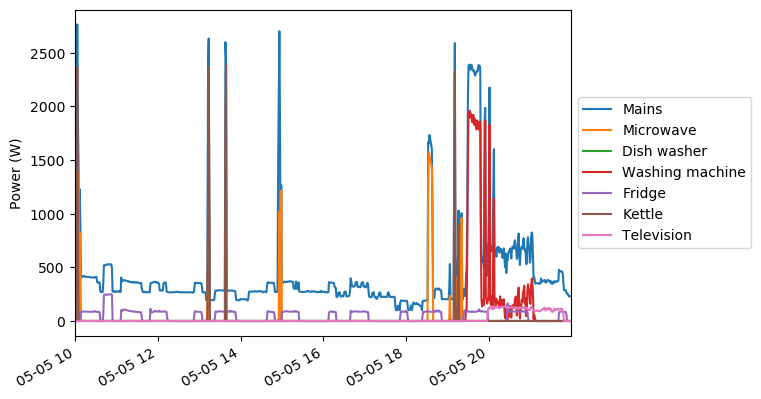

In [5]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2014-05-05 10:00:00", "2014-05-05 22:00:00")

# Define object, change building number accordingly
house_1 = dataset.buildings[1].elec

# Get appliances and mains
microwave = house_1.select_using_appliances(type='microwave')
dish_washer = house_1.select_using_appliances(type='dish washer')
washing_machine = house_1.select_using_appliances(type='washer dryer')
fridge = house_1.select_using_appliances(type='fridge freezer')
kettle = house_1.select_using_appliances(type='kettle')
television = house_1.select_using_appliances(type='television')
mains = house_1.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
microwave.plot(ax=ax)
dish_washer.plot(ax=ax)
washing_machine.plot(ax=ax)
fridge.plot(ax=ax)
kettle.plot(ax=ax)
television.plot(ax=ax)
ax.legend(['Mains', 'Microwave', 'Dish washer', 'Washing machine', 'Fridge', 'Kettle', 'Television'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


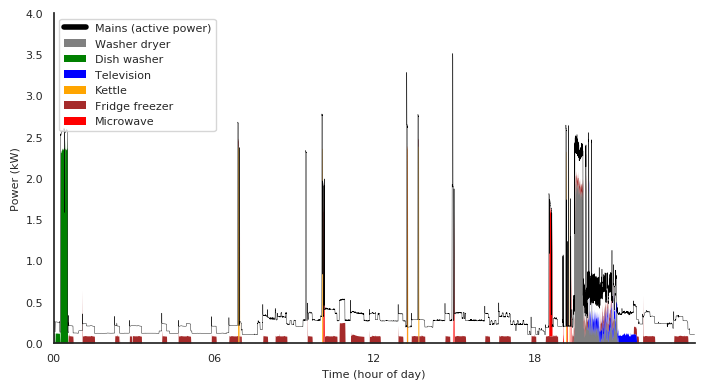

In [14]:
# Select appliances used in top K plot
APPLIANCES = ['kettle', 'fridge freezer', 'television', 'washer dryer', 'microwave', 'dish washer']
relevant_meters = []
for meter in submeters.meters:
    for appliance in APPLIANCES:
        if meter.matches_appliances({'type': appliance}):
            relevant_meters.append(meter)
            break

relevant_meters = MeterGroup(relevant_meters)

# Reverse the colour palette
colors = sns.color_palette('deep')
colors.reverse()
colors = ['grey', 'green', 'blue', 'orange', 'brown', 'red'] + colors[3:]

sns.set_palette(colors)

# Set window
DATE = "2014-05-05"
next_day = pd.Timestamp(DATE) + timedelta(days=1)
dataset.set_window(DATE, next_day)

# Plot area
ax, df = relevant_meters.plot(kind='area', unit=UNIT, width=4000, threshold=5,
                              plot_kwargs={'linewidth': 0})

# Plot mains
ax = elec.mains().plot(ax=ax, unit=UNIT, width=10000,
                       plot_kwargs={'linewidth': 0.3, 'color': 'black',
                                    'label': 'Mains (active power)'})

# Prettify
ax.grid(False)
ax.set_ylim([0, 4])
ax.set_xlabel('Time (hour of day)')
ax.xaxis.set_major_formatter(DateFormatter("%H", tz=TZ))
ax.xaxis.set_major_locator(HourLocator(interval=6, tz=TZ))
for text in ax.get_xticklabels():
    text.set_rotation(0)
    text.set_ha('center')
sns.despine(ax=ax)
legend = ax.legend(loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(4)

plot_config.format_axes(ax)
plt.tight_layout()

plt.show()


Loading data for meter ElecMeterID(instance=53, building=1, dataset='UK-DALE')      ElecMeterID(instance=15, building=1, dataset='UK-DALE')     
Done loading data all meters for this chunk.


C:\Users\cmcru\anaconda3\envs\nilmtk\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


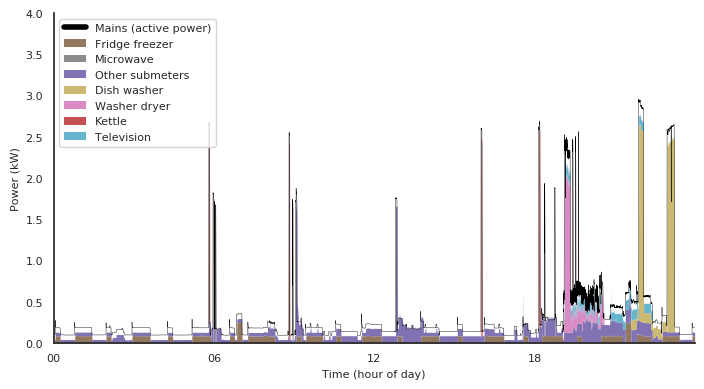

In [19]:
from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
from datetime import timedelta
import matplotlib.pyplot as plt
import pytz
import pandas as pd
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(180, 100)})

UNIT = 'kW'

dataset = DataSet('./Dataset/ukdale.h5')
TZ_STRING = dataset.metadata['timezone']
TZ = pytz.timezone(TZ_STRING)
elec = dataset.buildings[1].elec
submeters = elec.meters_directly_downstream_of_mains()

# Select appliances used in top K plot
APPLIANCES = ['fridge freezer', 'microwave', 'dish washer', 'washer dryer', 'kettle', 'television']
selected_meters = [submeters[appliance] for appliance in APPLIANCES]
remainder = []
for meter in submeters.meters:
    for appliance in APPLIANCES:
        if meter.matches_appliances({'type': appliance}):
            break
    else:
        remainder.append(meter)

remainder = MeterGroup(remainder)
remainder.name = 'Other submeters'
selected_meters = MeterGroup(selected_meters[:2] + [remainder] + selected_meters[2:])
#selected_meters['HTPC'].name = 'Home theatre PC'

# Reverse the colour palette so it matches top_5_energy
colors = sns.color_palette('deep')
colors.reverse()
colors = [colors[i] for i in [4, 2, 5, 1, 3, 6, 0]]
sns.set_palette(colors)

# Set window
DATE = "2014-05-07"
next_day = pd.Timestamp(DATE) + timedelta(days=1)
dataset.set_window(DATE, next_day)

# Plot area
# Need to use a linewidth of 0 to prevent nasty things appearing
# in output.  Looks bad in plt.show() though!
ax, df = selected_meters.plot(kind='area', unit=UNIT, width=4000, threshold=5,
                              plot_kwargs={'linewidth': 0})

# Plot mains
ax = elec.mains().plot(ax=ax, unit=UNIT, width=10000,
                       plot_kwargs={'linewidth': 0.3, 'color': 'black',
                                    'label': 'Mains (active power)'})

# Prettify
ax.grid(False)
ax.set_ylim([0, 4])
ax.set_xlabel('Time (hour of day)')
ax.xaxis.set_major_formatter(DateFormatter("%H", tz=TZ))
ax.xaxis.set_major_locator(HourLocator(interval=6, tz=TZ))
for text in ax.get_xticklabels():
    text.set_rotation(0)
    text.set_ha('center')
sns.despine(ax=ax)
legend = ax.legend(loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(4)

plot_config.format_axes(ax)
plt.tight_layout()

plt.draw()

### House 2

use 25-30 may

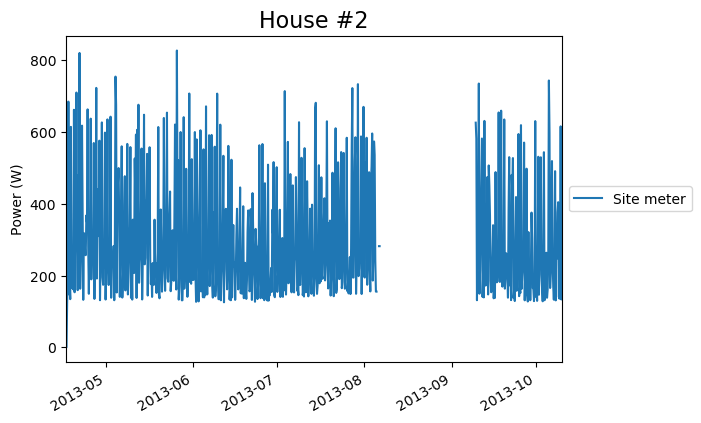

Loading data for meter ElecMeterID(instance=20, building=2, dataset='UK-DALE')     
Done loading data all meters for this chunk.


active       apparent        voltage
count  202688.000000  202688.000000  297117.000000
mean      241.148570     333.241913     366.375854
std         1.624866     455.576477     710.763733
min       231.635162     127.026001      35.988892
25%       240.154495     164.513123     142.399994
50%       241.263168     220.977020     202.532501
75%       242.270996     301.428345     355.866577
max       247.208328    6694.275879   10671.783203

In [5]:
#Creating DF on mains for each house

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
#dataset.set_window("2013-06-01", "2013-06-02")
dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

#test plot
mains_2 = house_2.mains()
ax = mains_2.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('House #2', fontsize=16)
plt.show()

#Check column names
#print(mainsdf_1.columns)

#Passing data to a dataframe and renaming columns
mainsdf_2 = next(house_2.load(sample_period=60))
mainsdf_2.columns = ['active', 'apparent', 'voltage']
#mainsdf_2.head()


mainsdf_2.describe()

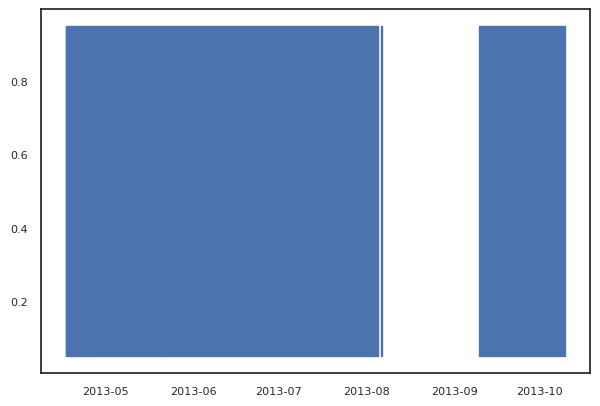

In [57]:
good_sections_2 = mains_2.good_sections()
good_sections_2.plot()

(<networkx.classes.digraph.DiGraph at 0x1f5dc13e820>,
 <matplotlib.axes._axes.Axes at 0x1f5b58e1340>)

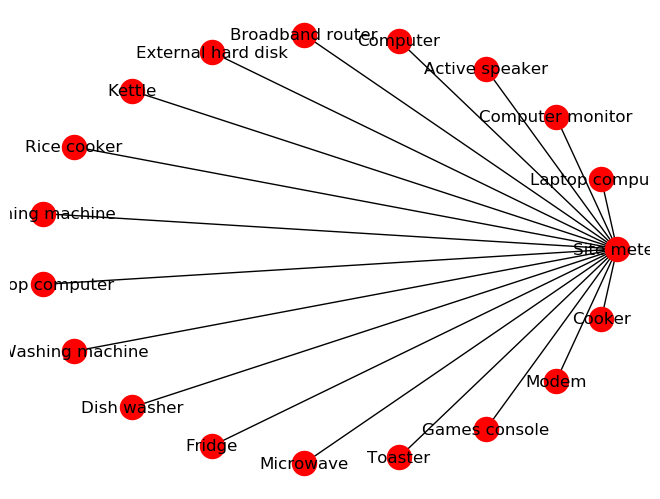

In [6]:
# Plot the wiring diagram
house_2.draw_wiring_graph()

In [7]:
#list of appliances
all_appliances_2 = house_2.appliances
all_appliance_labels_2 = [app.label() for app in all_appliances_2]
print(all_appliance_labels_2)

["('microwave', 1)", "('fridge', 1)", "('toaster', 1)", "('cooker', 1)", "('modem', 1)", "('computer', 1)", "('kettle', 1)", "('laptop computer', 2)", "('washing machine', 1)", "('external hard disk', 1)", "('active speaker', 1)", "('games console', 1)", "('broadband router', 1)", "('laptop computer', 1)", "('dish washer', 1)", "('computer monitor', 1)", "('running machine', 1)", "('rice cooker', 1)"]


#### Checking 22-28 May 2013 (from monday to sunday)

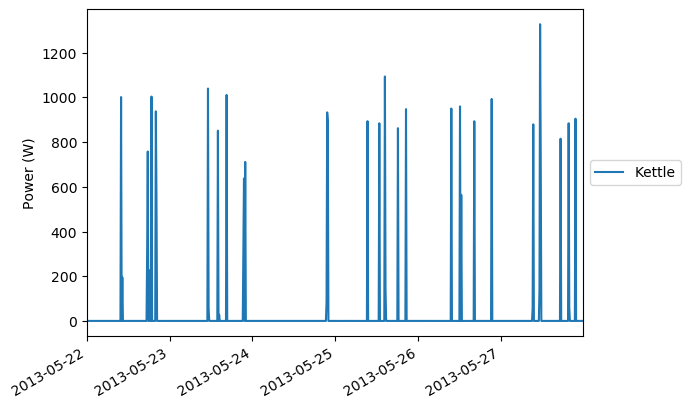

In [29]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2013-05-22", "2013-05-28")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

kettle = house_2.select_using_appliances(type='kettle')
ax = kettle.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# The average kettle is between 2 and 3 kilowatts (kw). The electricity 
# that you use in your home is measures in kilowatt hours (kWh) which is the number of kilowatts used per hour.

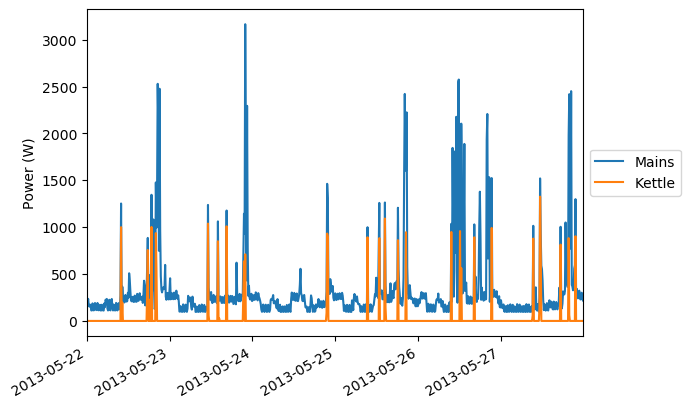

In [30]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-22", "2013-05-28")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get kettle and mains appliances
kettle = house_2.select_using_appliances(type='kettle')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
kettle.plot(ax=ax)
ax.legend(['Mains', 'Kettle'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


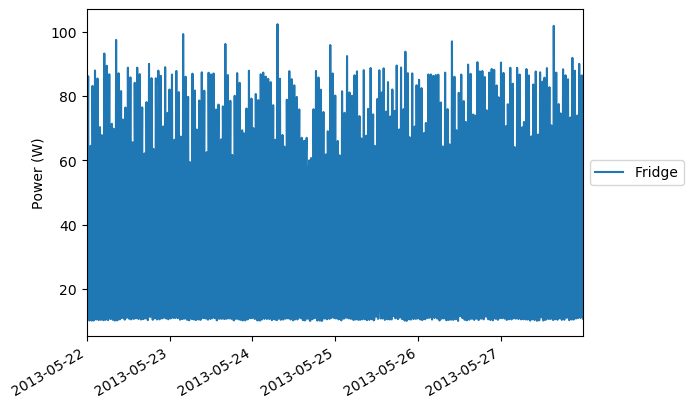

In [31]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2013-05-22", "2013-05-28")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

fridge = house_2.select_using_appliances(type='fridge')
ax = fridge.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# The power consumption of a fridge can vary depending on its size, age, efficiency rating, and usage pattern. Some small or energy-efficient 
# models consume as little as 50-100 watts, while larger and older models can consume more than 300 watts.

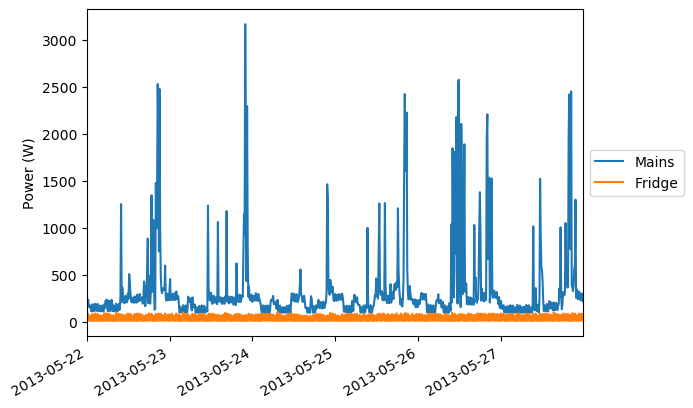

In [32]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-22", "2013-05-28")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get kettle and mains appliances
fridge = house_2.select_using_appliances(type='fridge')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
fridge.plot(ax=ax)
ax.legend(['Mains', 'Fridge'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


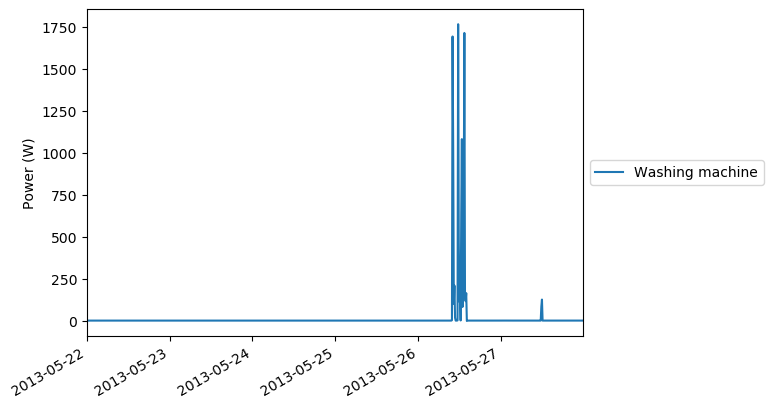

In [33]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2013-05-22", "2013-05-28")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

washing_machine = house_2.select_using_appliances(type='washing machine')
ax = washing_machine.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#Most washing machines require from 400 Watts to 2000 or even more Watts

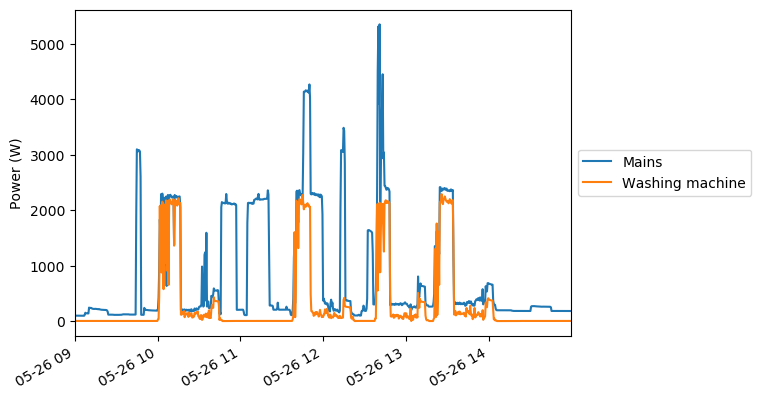

In [55]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-26 09:00:00", "2013-05-26 15:00:00")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get kettle and mains appliances
wasing_machine = house_2.select_using_appliances(type='washing machine')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
washing_machine.plot(ax=ax)
ax.legend(['Mains', 'Washing machine'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

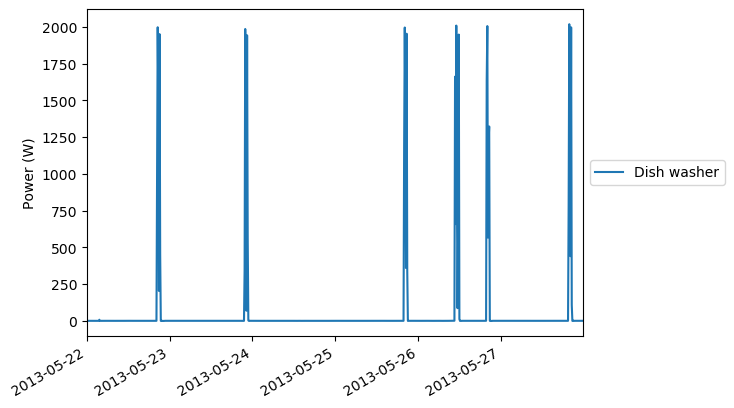

In [34]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2013-05-22", "2013-05-28")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

dish_washer = house_2.select_using_appliances(type='dish washer')
ax = dish_washer.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

#Dishwashers use between 1200 and 2400 watts of power, with an average dishwasher using 1800 watts.

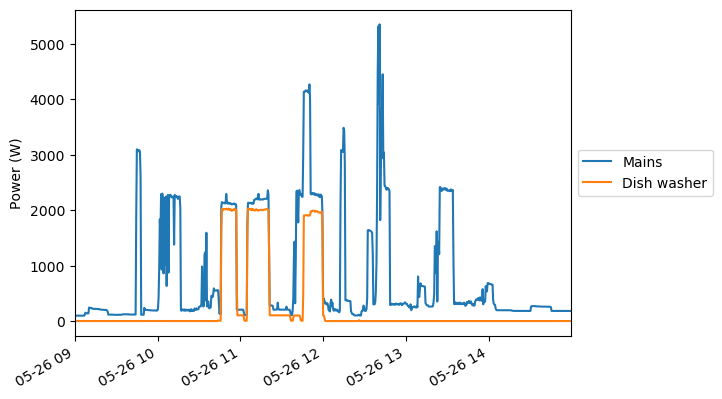

In [60]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-26 09:00:00", "2013-05-26 15:00:00")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get kettle and mains appliances
dish_washer = house_2.select_using_appliances(type='dish washer')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
dish_washer.plot(ax=ax)
ax.legend(['Mains', 'Dish washer'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

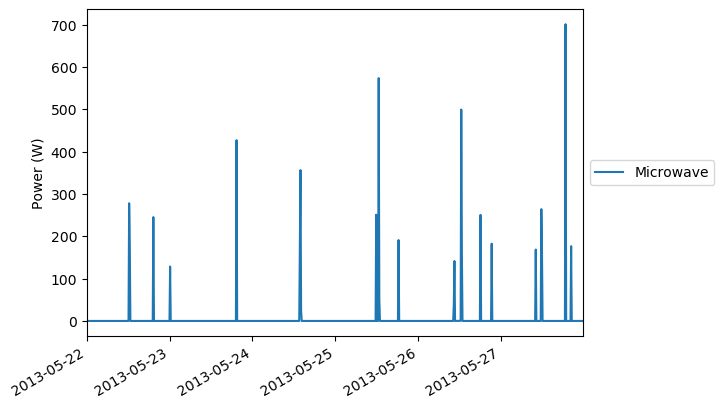

In [35]:
#Checking applieances

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window("2013-05-22", "2013-05-28")
#dataset.set_window(None, None)

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

microwave = house_2.select_using_appliances(type='microwave')
ax = microwave.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

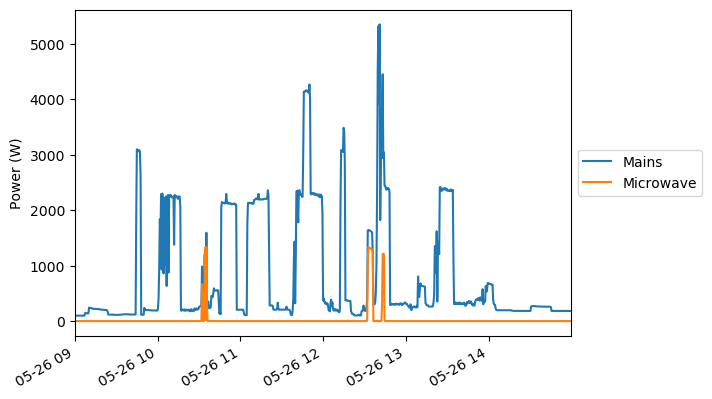

In [66]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-26 09:00:00", "2013-05-26 15:00:00")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get kettle and mains appliances
microwave = house_2.select_using_appliances(type='microwave')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
microwave.plot(ax=ax)
ax.legend(['Mains', 'Microwave'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

Plot selected appliances

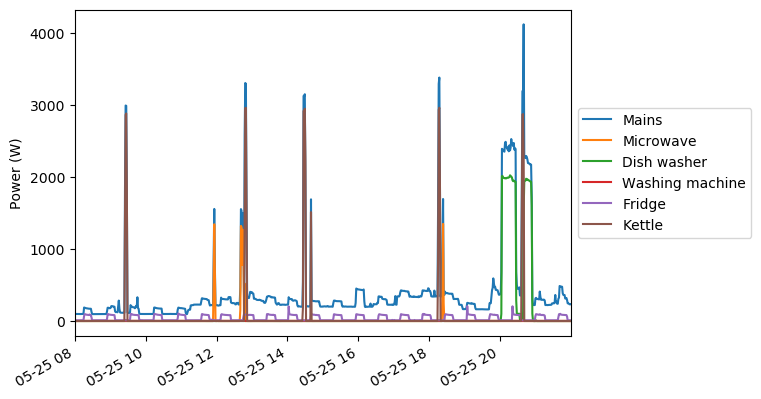

In [46]:
#Checking appliances
dataset = DataSet('./Dataset/ukdale.h5')

# Set time window
dataset.set_window("2013-05-25 08:00:00", "2013-05-25 22:00:00")

# Define object, change building number accordingly
house_2 = dataset.buildings[2].elec

# Get appliances and mains
microwave = house_2.select_using_appliances(type='microwave')
dish_washer = house_2.select_using_appliances(type='dish washer')
wasing_machine = house_2.select_using_appliances(type='washing machine')
fridge = house_2.select_using_appliances(type='fridge')
kettle = house_2.select_using_appliances(type='kettle')
mains = house_2.mains()

# Plot kettle and mains power consumption in the same plot
ax = mains.plot()
microwave.plot(ax=ax)
dish_washer.plot(ax=ax)
wasing_machine.plot(ax=ax)
fridge.plot(ax=ax)
kettle.plot(ax=ax)
ax.legend(['Mains', 'Microwave', 'Dish washer', 'Washing machine', 'Fridge', 'Kettle'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

### House 3

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


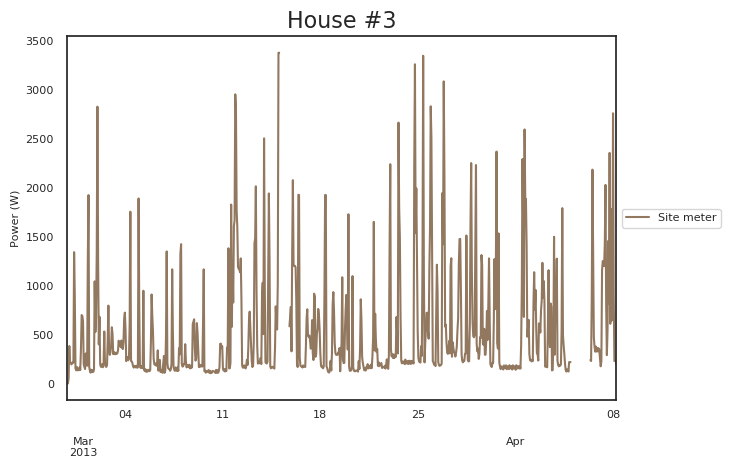

Loading data for meter ElecMeterID(instance=5, building=3, dataset='UK-DALE')     
Done loading data all meters for this chunk.


active      apparent
count  52856.000000  52669.000000
mean     103.845909    515.699158
std      369.545807    698.846558
min        0.900000      4.000000
25%        3.000000    167.699997
50%        3.000000    240.399994
75%       21.000000    491.444458
max     5541.200195   4066.666748

In [58]:
#Creating DF on mains for each house

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window(None, None)

# Define object, change building number accordingly
house_3 = dataset.buildings[3].elec

#test plot
mains_3 = house_3.mains()
ax = mains_3.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('House #3', fontsize=16)
plt.show()


#Passing data to a dataframe and renaming columns
#This house doesnt seem to have voltage data inside mains
mainsdf_3 = next(house_3.load(sample_period=60))
mainsdf_3.columns = ['active', 'apparent']
#mainsdf_3.head()


mainsdf_3.describe()

#Check column names
#print(mainsdf_3.columns)

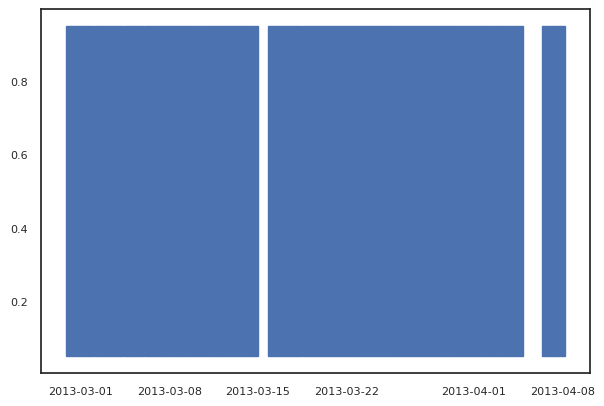

In [59]:
good_sections_3 = mains_3.good_sections()
good_sections_3.plot()

### House 4

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\pandas\core\arrays\datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


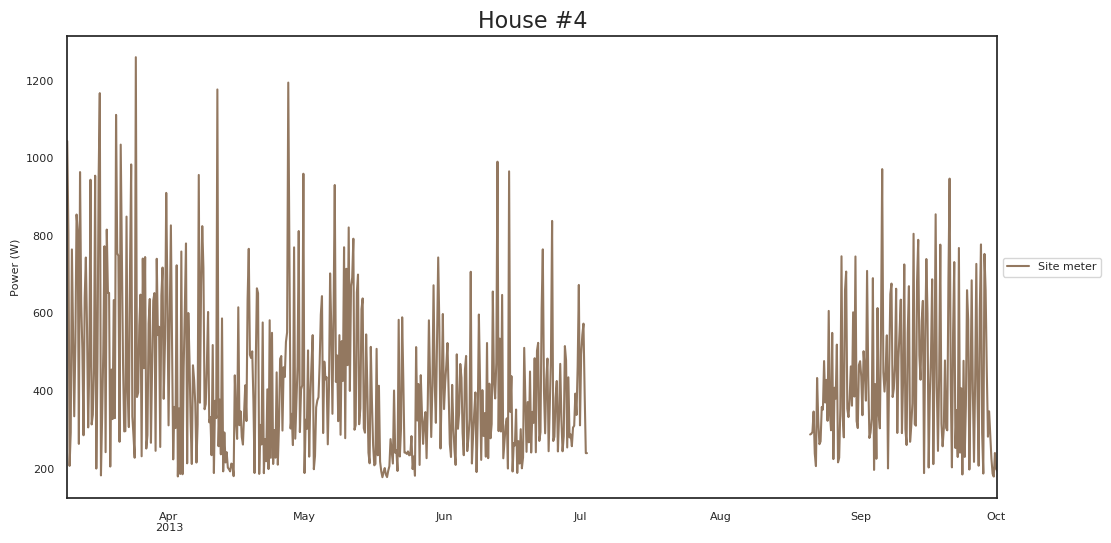

Loading data for meter ElecMeterID(instance=6, building=4, dataset='UK-DALE')     
Done loading data all meters for this chunk.


active       apparent
count  224369.000000  224462.000000
mean      117.747284     426.856201
std       242.906891     483.944153
min         0.000000     128.000000
25%        23.799999     198.899994
50%       110.444443     272.000000
75%       120.555557     444.399994
max      4979.066406    6963.899902

In [60]:
#Creating DF on mains for each house

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window(None, None)

# Define object, change building number accordingly
house_4 = dataset.buildings[4].elec

#test plot
mains_4 = house_4.mains()
fig, ax = plt.subplots(figsize=(12,6))
mains_4.plot(ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('House #4', fontsize=16)
plt.show()


#Passing data to a dataframe and renaming columns
#This house doesnt seem to have voltage data inside mains
mainsdf_4 = next(house_4.load(sample_period=60))
mainsdf_4.columns = ['active', 'apparent']
#mainsdf_4.head()


mainsdf_4.describe()

#Check column names
#print(mainsdf_4.columns)

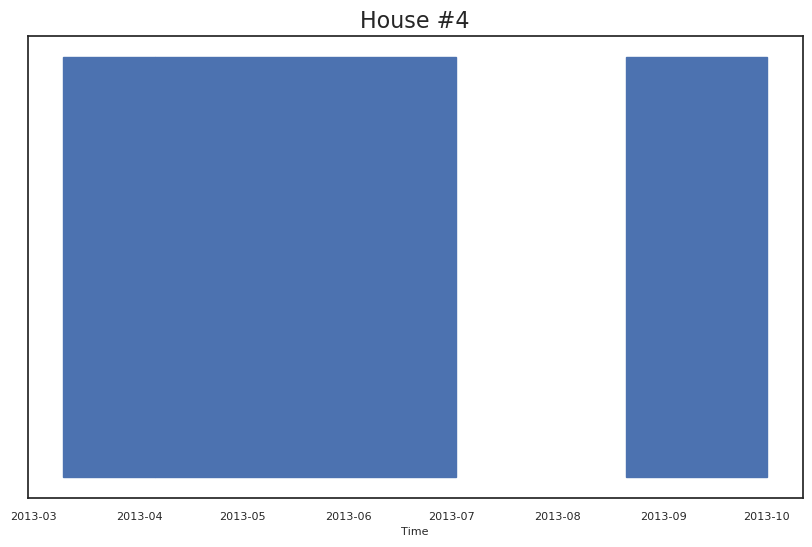

In [61]:
good_sections_4 = mains_4.good_sections()
fig, ax = plt.subplots(figsize=(10,6))
good_sections_4.plot(ax=ax)
ax.set_xlabel('Time')
ax.set_ylabel('')
ax.set_yticks([])
ax.set_title('House #4', fontsize=16)
plt.show()


In [62]:
mainsdf_4.shape

(296076, 2)

In [63]:
mainsdf_4.dtypes

active      float32
apparent    float32
dtype: object

In [64]:
mainsdf_4.isna().sum()

active      71707
apparent    71614
dtype: int64

In [65]:
mainsdf_4.head()

active     apparent
2013-03-09 14:40:00+00:00  217.125000   630.222229
2013-03-09 14:41:00+00:00  216.200012   627.799988
2013-03-09 14:42:00+00:00  214.199997  2382.399902
2013-03-09 14:43:00+00:00  212.799988  2987.199951
2013-03-09 14:44:00+00:00  214.100006  1046.900024

In [66]:
mainsdf_4_active = mainsdf_4.copy()
mainsdf_4_active = mainsdf_4_active.drop(columns=['apparent'])
mainsdf_4_active.dropna(inplace=True)
mainsdf_4_active.describe()

#same count, further investigate

active
count  224369.000000
mean      117.747276
std       242.906891
min         0.000000
25%        23.799999
50%       110.444443
75%       120.555557
max      4979.066406

In [67]:
mainsdf_4_active.isna().sum()

active    0
dtype: int64

Creating a dataframe resampled at 1 hour intervals and taking the mean

In [91]:
import pandas as pd

# Create a new DataFrame with the active power consumption data
hourly_means = mainsdf_4['active'].resample('H').mean()

# Add an 'Hour' column to the DataFrame
hourly_means = pd.DataFrame(hourly_means)
hourly_means['Hour'] = hourly_means.index.hour
hourly_means.head(24)

active  Hour
2013-03-09 14:00:00+00:00  207.642365    14
2013-03-09 15:00:00+00:00  338.678162    15
2013-03-09 16:00:00+00:00   72.596855    16
2013-03-09 17:00:00+00:00   72.362221    17
2013-03-09 18:00:00+00:00  162.799255    18
2013-03-09 19:00:00+00:00  154.088882    19
2013-03-09 20:00:00+00:00  251.667786    20
2013-03-09 21:00:00+00:00  969.160828    21
2013-03-09 22:00:00+00:00  323.130737    22
2013-03-09 23:00:00+00:00  241.887970    23
2013-03-10 00:00:00+00:00  106.922775     0
2013-03-10 01:00:00+00:00   51.532963     1
2013-03-10 02:00:00+00:00   72.371666     2
2013-03-10 03:00:00+00:00   47.804443     3
2013-03-10 04:00:00+00:00   53.152592     4
2013-03-10 05:00:00+00:00  102.693886     5
2013-03-10 06:00:00+00:00  144.218521     6
2013-03-10 07:00:00+00:00  200.105179     7
2013-03-10 08:00:00+00:00   78.824631     8
2013-03-10 09:00:00+00:00   93.511482     9
2013-03-10 10:00:00+00:00   44.287964    10
2013-03-10 11:00:00+00:00   53.321480    11
2013-03-10 12:00:00+00:00   50.428333    12
2013-03-10 13:00:00+00:00  165.078522    13

Removing the outliers and creating a boxplot

Number of outliers: 186


C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Active Power Consumption (Watts)')

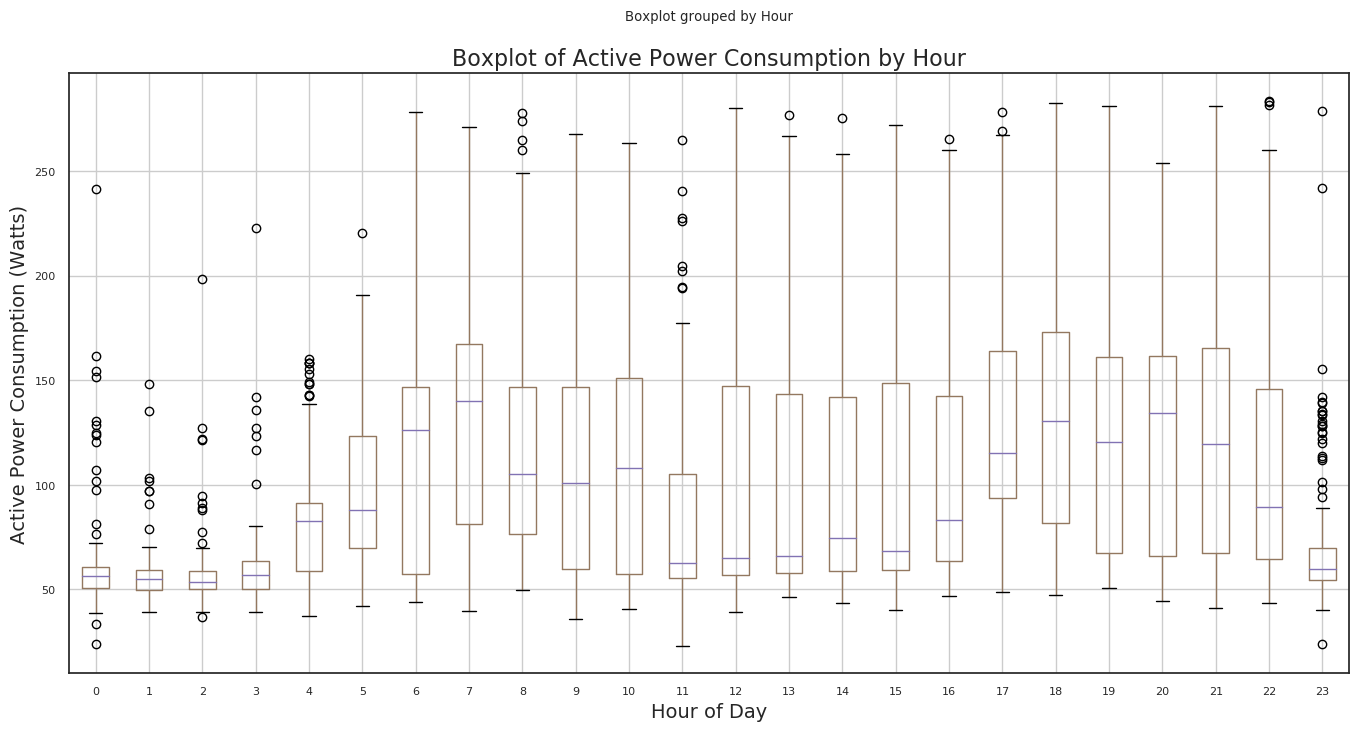

In [123]:
fig, ax = plt.subplots(figsize=(16, 8))

plot_df_bp = hourly_means.copy()


# Check for outliers in 'active' column
Q1 = plot_df_bp['active'].quantile(0.25)
Q3 = plot_df_bp['active'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
outliers = plot_df_bp[(plot_df_bp['active'] < lower_bound) | (plot_df_bp['active'] > upper_bound)]
print('Number of outliers:', len(outliers))

# Remove outliers
plot_df_bp = plot_df_bp[(plot_df_bp['active'] >= lower_bound) & (plot_df_bp['active'] <= upper_bound)]

# Generate new boxplot without outliers
plot_df_bp.boxplot(by='Hour', column=['active'], ax = ax)
ax.set_title('Boxplot of Active Power Consumption by Hour', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Active Power Consumption (Watts)', fontsize=14)

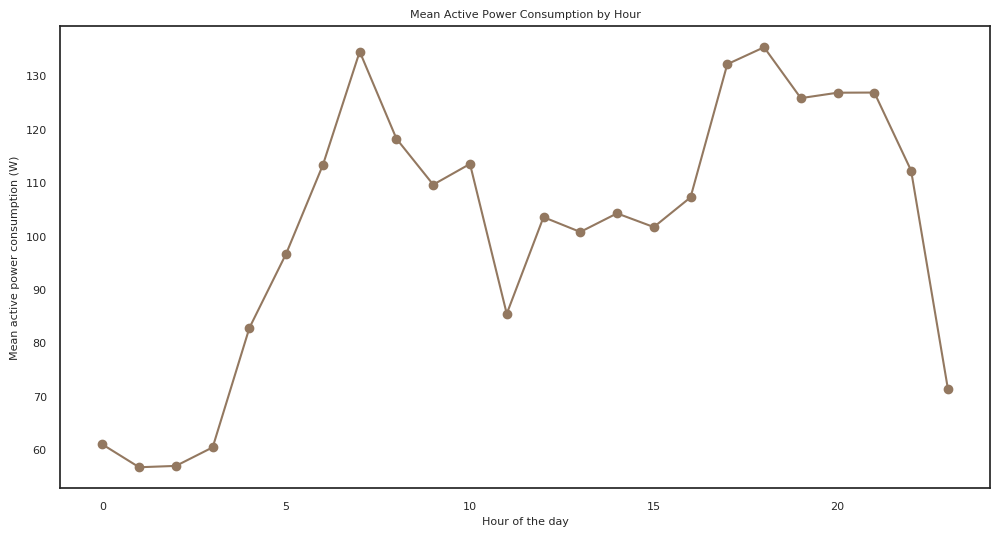

In [124]:
import matplotlib.pyplot as plt

# Create a copy of the mains data with only the 'active' column USING FILTERED DATA
mains_active = plot_df_bp.copy()

# Calculate the mean active power consumption for each hour of the day
hourly_mean = mains_active.groupby(mains_active.index.hour).mean()

# Create the line plot
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(hourly_mean.index, hourly_mean['active'], marker='o')
ax.set_xlabel('Hour of the day')
ax.set_ylabel('Mean active power consumption (W)')
ax.set_title('Mean Active Power Consumption by Hour')
plt.show()

In [117]:
# Test datasample every 5min

import pandas as pd

# Create a new DataFrame with the active power consumption data
five_min_means = mainsdf_4['active'].resample('5T').mean()

# Add a 'Minute' column to the DataFrame
five_min_means = pd.DataFrame(five_min_means)
five_min_means['Minute'] = five_min_means.index.minute
five_min_means.head(24)


active  Minute
2013-03-09 14:40:00+00:00   214.884995      40
2013-03-09 14:45:00+00:00   212.100006      45
2013-03-09 14:50:00+00:00   213.222229      50
2013-03-09 14:55:00+00:00   190.362228      55
2013-03-09 15:00:00+00:00   646.211121       0
2013-03-09 15:05:00+00:00    23.020000       5
2013-03-09 15:10:00+00:00    59.439999      10
2013-03-09 15:15:00+00:00    64.180000      15
2013-03-09 15:20:00+00:00   137.124435      20
2013-03-09 15:25:00+00:00  2097.100098      25
2013-03-09 15:30:00+00:00   247.500000      30
2013-03-09 15:35:00+00:00   239.244431      35
2013-03-09 15:40:00+00:00   237.857773      40
2013-03-09 15:45:00+00:00   191.780014      45
2013-03-09 15:50:00+00:00    58.180000      50
2013-03-09 15:55:00+00:00    62.500000      55
2013-03-09 16:00:00+00:00    59.480000       0
2013-03-09 16:05:00+00:00    60.000000       5
2013-03-09 16:10:00+00:00    61.980000      10
2013-03-09 16:15:00+00:00   163.139999      15
2013-03-09 16:20:00+00:00   149.251114      20
2013-03-09 16:25:00+00:00   147.137772      25
2013-03-09 16:30:00+00:00   102.702217      30
2013-03-09 16:35:00+00:00    21.077778      35

In [126]:
#checking the hourly mean data which is already filter & corrected for outliers
hourly_mean

active  Hour
0    61.050785     0
1    56.773388     1
2    57.026768     2
3    60.503170     3
4    82.891281     4
5    96.796700     5
6   113.432915     6
7   134.643616     7
8   118.313080     8
9   109.713921     9
10  113.599625    10
11   85.520393    11
12  103.630104    12
13  100.853409    13
14  104.337730    14
15  101.771194    15
16  107.336563    16
17  132.282639    17
18  135.456787    18
19  125.924644    19
20  126.941422    20
21  126.970428    21
22  112.362953    22
23   71.506538    23

In [127]:
#checking the mains data which is already filter & corrected for outliers
mains_active

active  Hour
2013-03-09 14:00:00+00:00  207.642365    14
2013-03-09 16:00:00+00:00   72.596855    16
2013-03-09 17:00:00+00:00   72.362221    17
2013-03-09 18:00:00+00:00  162.799255    18
2013-03-09 19:00:00+00:00  154.088882    19
...                               ...   ...
2013-10-01 02:00:00+01:00   57.117039     2
2013-10-01 03:00:00+01:00   43.396667     3
2013-10-01 04:00:00+01:00   41.525742     4
2013-10-01 05:00:00+01:00  101.322777     5
2013-10-01 06:00:00+01:00  101.199303     6

[3557 rows x 2 columns]

In [128]:
# The new index now contains only the date (DD/MM/YYYYYY).
mains_active.index = mains_active.index.date
mains_active

active  Hour
2013-03-09  207.642365    14
2013-03-09   72.596855    16
2013-03-09   72.362221    17
2013-03-09  162.799255    18
2013-03-09  154.088882    19
...                ...   ...
2013-10-01   57.117039     2
2013-10-01   43.396667     3
2013-10-01   41.525742     4
2013-10-01  101.322777     5
2013-10-01  101.199303     6

[3557 rows x 2 columns]

In [74]:
#Create a new DataFrame df_household_pivot by pivoting the mains_active DataFrame by the Hour column. 
#This means that the values in the Hour column will become the new columns of 
#the df_household_pivot DataFrame, and the values in the active column will populate those columns.

df_household_pivot = mains_active.pivot(columns='Hour')

#dropping any rows with missing values
df_household_pivot = df_household_pivot.dropna()

df_household_pivot.head()

active                                              \
Hour                0          1          2          3          4    
2013-03-10  106.922775  51.532963  72.371666  47.804443  53.152592   
2013-03-22   33.400925  41.887222  45.940742  48.994259  48.048702   
2013-04-02   42.536667  39.649445  39.868519  42.448334  82.328705   
2013-04-09   46.870743  52.077221  50.142776  53.970924  87.262779   
2013-04-10   47.208706  46.897778  45.018936  50.440556  85.837410   

                                                                        ...  \
Hour                5           6           7           8           9   ...   
2013-03-10  102.693886  144.218521  200.105179   78.824631   93.511482  ...   
2013-03-22   91.654442  146.633514  239.570923  198.383148  246.644821  ...   
2013-04-02  144.303329  144.732971  213.806854  102.887779  101.952034  ...   
2013-04-09  142.485184  141.984634  143.110184  146.209259  144.603882  ...   
2013-04-10  145.264267  147.266296  147.061111  167.371475  148.170929  ...   

                                                                        \
Hour                14          15          16          17          18   
2013-03-10  143.222961  255.099258  252.062775  198.134079  279.982239   
2013-03-22   52.921482   72.912964  209.606110  242.359680  153.453339   
2013-04-02   54.015186   47.953888  100.132774   66.479256  187.482956   
2013-04-09   52.368889   51.187222  103.050003  148.284439  136.724442   
2013-04-10   54.605927   57.391109  104.891663   91.146667   63.032963   

                                                                        
Hour                19          20          21          22          23  
2013-03-10  153.706116  220.526672  234.160782  248.968521  125.129997  
2013-03-22  149.519257  152.068146  153.628143  250.538712  120.184631  
2013-04-02  128.845184  142.903152  224.738708  257.548706   43.274815  
2013-04-09  157.143524  148.042786  148.802216  157.323517   42.007221  
2013-04-10   55.499813  135.230560  153.950180   86.723312   49.339630  

[5 rows x 24 columns]

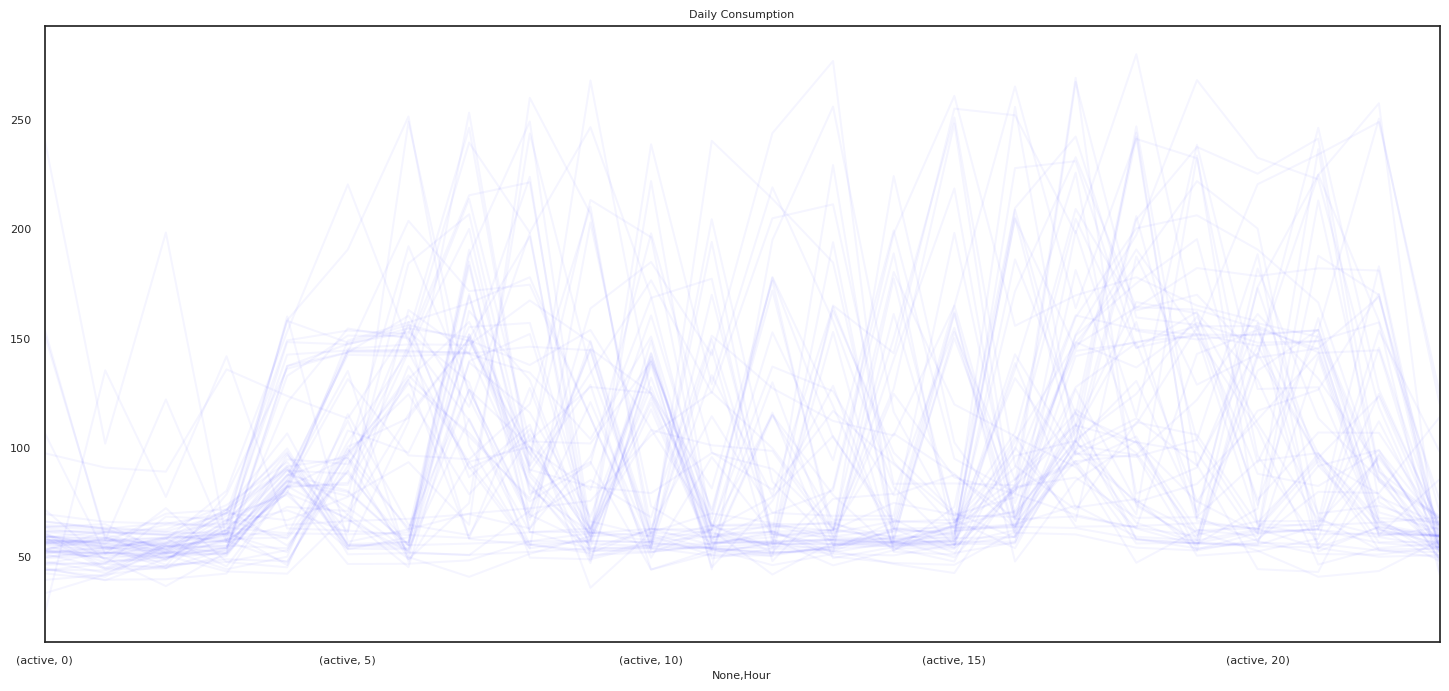

In [129]:
# Hourly consumption. Dataframe has to be transposed.
df_household_pivot.T.plot(figsize=(18, 8), title='Daily Consumption', legend=False, color='blue', alpha=0.04)

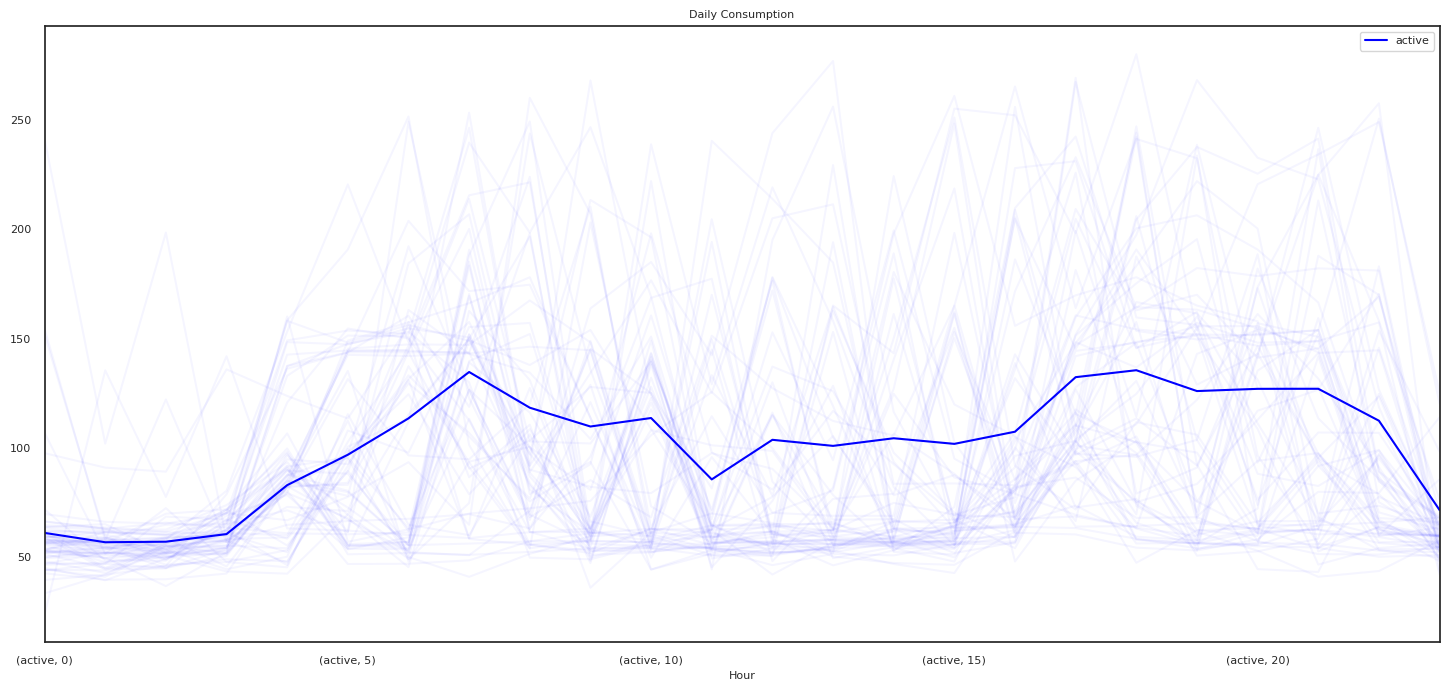

In [130]:
import matplotlib.pyplot as plt

# Hourly consumption. Dataframe has to be transposed.
ax = df_household_pivot.T.plot(figsize=(18, 8), title='Daily Consumption', legend=False, color='blue', alpha=0.04)

# Plot the mean line
hourly_mean.plot(x='Hour', y='active', color='blue', ax=ax)

plt.show()



Creating the plot for an specific day, with an specific sampling rate (no resample)

Loading data for meter ElecMeterID(instance=6, building=4, dataset='UK-DALE')     
Done loading data all meters for this chunk.


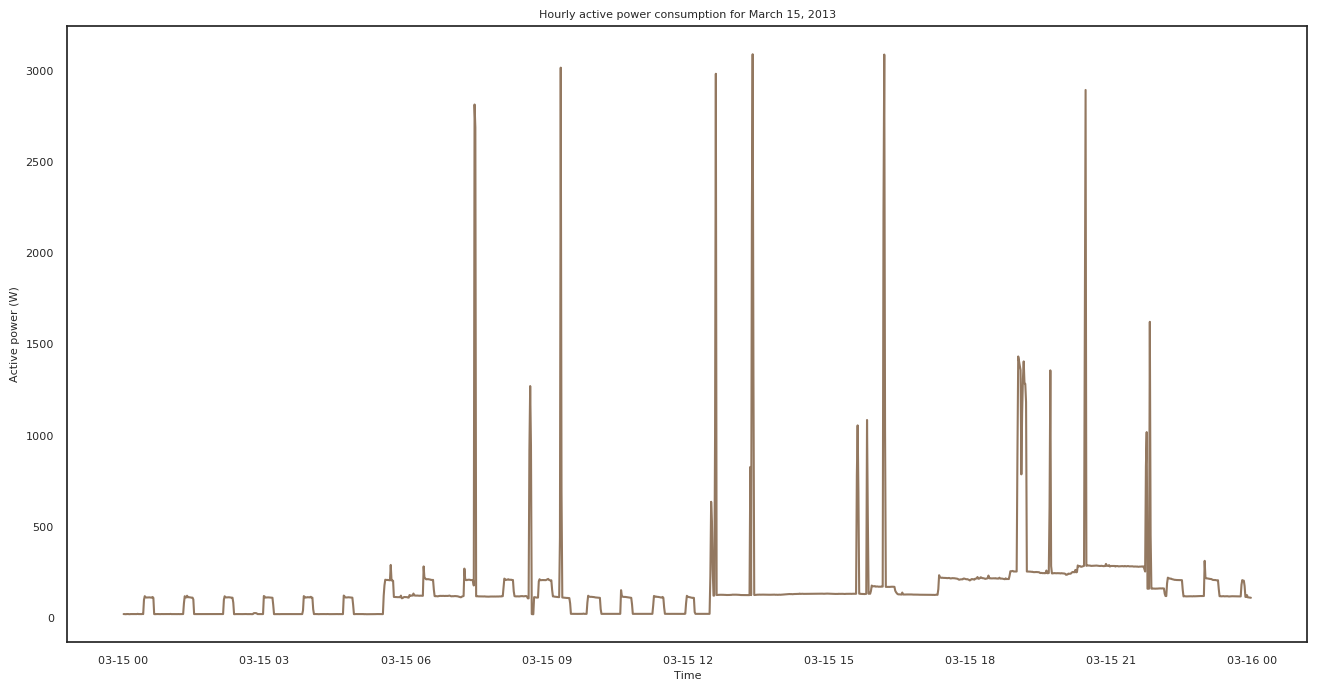

In [219]:
# plot for an specific day / this is very different with resampling as observed above
# Set the desired date

#data every desired sampling period. just takes the value, no resample or averages

df_4= next(house_4.load(sample_period=60))
df_4.columns = ['active', 'apparent']

# Select data for March 15, 2013
mainsdf_4_mar15 = df_4['2013-03-15']

# Plot active power consumption for March 15, 2013
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(mainsdf_4_mar15.index, mainsdf_4_mar15['active'])
ax.set_xlabel('Time')
ax.set_ylabel('Active power (W)')
ax.set_title('Hourly active power consumption for March 15, 2013')
plt.show()



Idenfying appliances

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


(<networkx.classes.digraph.DiGraph at 0x22f2cf87c10>,
 <matplotlib.axes._axes.Axes at 0x22f2eba9700>)

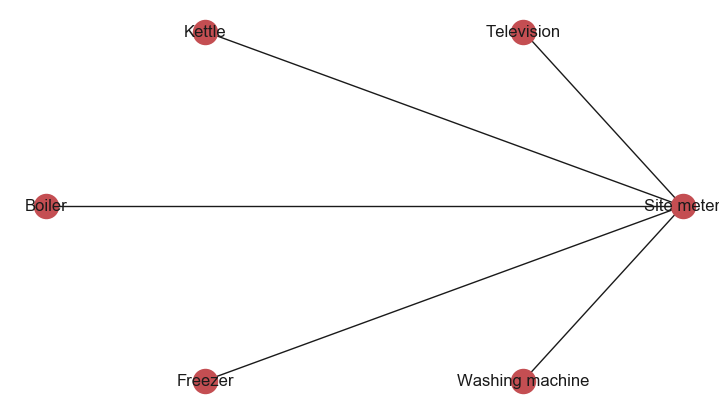

In [179]:
# Plot the wiring diagram
house_4.draw_wiring_graph()

#house_4 object was defined at the beggining



In [136]:
#list of appliances if House 4
all_appliances = house_4.appliances
all_appliance_labels = [app.label() for app in all_appliances]
print(all_appliance_labels)

["('boiler', 1)", "('microwave', 1)", "('freezer', 1)", "('kettle', 1)", "('television', 1)", "('washing machine', 1)", "('set top box', 1)", "('DVD player', 1)", "('radio', 1)", "('breadmaker', 1)", "('light', 1)"]


In [154]:
#how this appliances are wired, to which electmeter?
house_4.submeters()

MeterGroup(meters=
  ElecMeter(instance=2, building=4, dataset='UK-DALE', appliances=[Appliance(type='television', instance=1), Appliance(type='DVD player', instance=1), Appliance(type='set top box', instance=1), Appliance(type='light', instance=1)])
  ElecMeter(instance=3, building=4, dataset='UK-DALE', appliances=[Appliance(type='kettle', instance=1), Appliance(type='radio', instance=1)])
  ElecMeter(instance=4, building=4, dataset='UK-DALE', appliances=[Appliance(type='boiler', instance=1)])
  ElecMeter(instance=5, building=4, dataset='UK-DALE', appliances=[Appliance(type='freezer', instance=1)])
  ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])
)

In [184]:
#list of available methods in this object
print(dir(house_4))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_aggregate_metadata_attribute', '_check_kwargs_for_full_results_and_sections', '_collect_stats_on_all_meters', '_convert_physical_quantity_and_ac_type_to_cols', '_energy_per_meter_with_remainder', '_meter_generators', '_plot_area', '_plot_energy_bar', '_plot_sankey', '_plot_separate_lines', '_prep_kwargs_for_sample_period_and_resample', '_replace_none_with_meter_timeframe', '_set_sample_period', 'activation_series', 'activity_histogram', 'all_meters', 'appliances', 'available_ac_types', 'available_physical_quantities', 'available_power_ac_types', 'average_energy_per_period', 'building', 'call_method_on_all_meters', 'clear_cache', '

Loading data for meter ElecMeterID(instance=6, building=4, dataset='UK-DALE')     
Done loading data all meters for this chunk.


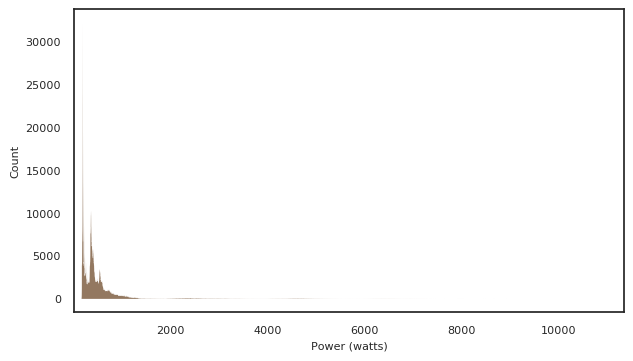

In [221]:
house_4.plot_power_histogram()

5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

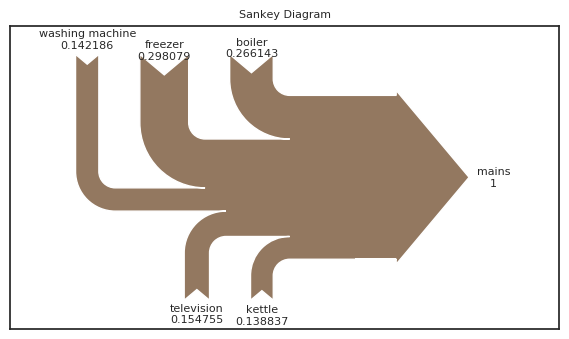

In [193]:
house_4._plot_sankey()


5/5 ElecMeter(instance=6, building=4, dataset='UK-DALE', appliances=[Appliance(type='washing machine', instance=1), Appliance(type='microwave', instance=1), Appliance(type='breadmaker', instance=1)])liance(type='light', instance=1)])

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


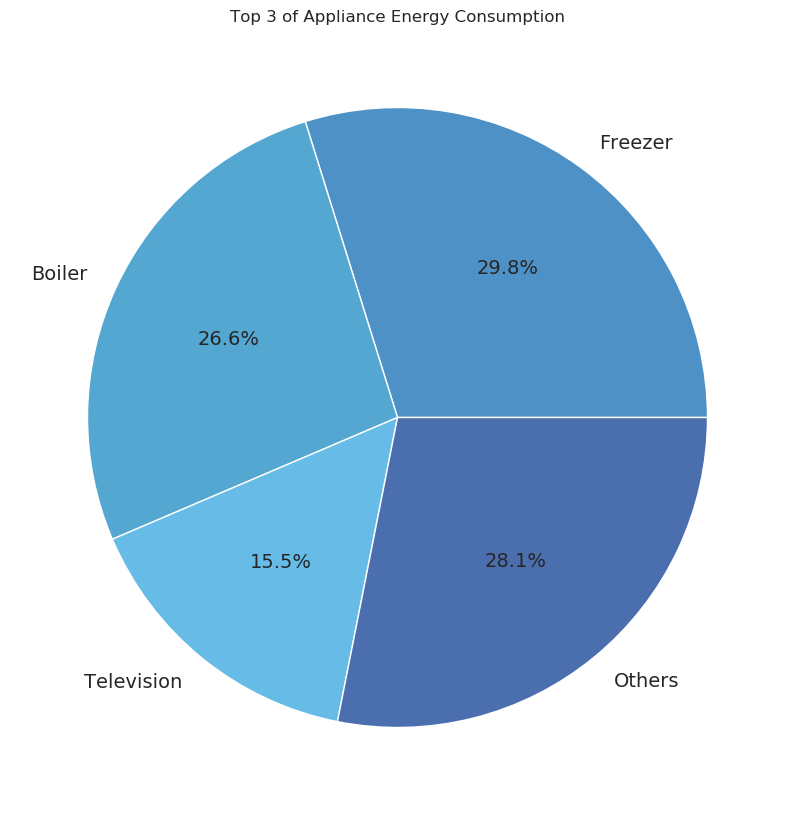

In [215]:
fraction = house_4.submeters().fraction_per_meter().dropna()

# Sorting the value to descending order
fraction_sorted = fraction.sort_values(ascending=False)

# Create series object for the top 10 appliance
fraction_top = fraction_sorted.head(3)

# Sum up the Other appliance value
others_val = 1 - fraction_top.sum()
fraction_top

# Create colors

colors = ['#4D91C6', '#53A7D1', '#67BCE7','#4B6EAF', '#8AC9EB']

# Create Pie Chart

labels = house_sample.get_labels(fraction_top.index)
labels.append('Others')

fraction_top['Others'] = others_val
plt.figure(figsize=(10,30))
plt.title("Top 3 of Appliance Energy Consumption", fontsize=12)
fraction_top.plot(kind='pie', labels=labels, 
                  autopct='%1.1f%%', label="", colors=colors, textprops={'fontsize': 14});

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


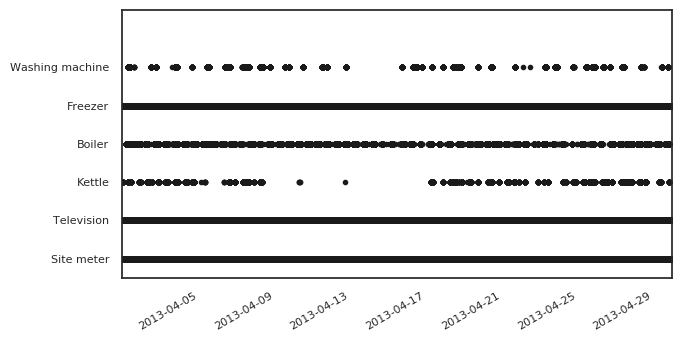

In [256]:
uk_dale = DataSet('./Dataset/ukdale.h5')

#test in a small window
uk_dale.set_window('2013-04-01','2013-04-30' )

plot_4_on = uk_dale.buildings[4].elec


plot_4_on.plot_when_on(on_power_threshold = 10)

Area plot

C:\Users\cmcru\anaconda3\envs\nilmtk-env\lib\site-packages\nilmtk\elecmeter.py:188: RuntimeWarning: Multiple appliances are associated with meter {} but none are marked as the dominant appliance. Hence returning the first appliance in the list.
  warn('Multiple appliances are associated with meter {}'


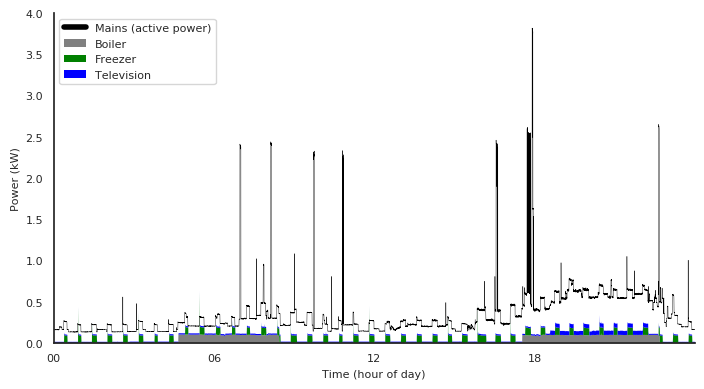

In [255]:
from __future__ import print_function, division
from nilmtk import DataSet, TimeFrame, MeterGroup
import plot_config
import seaborn as sns
from matplotlib.dates import DateFormatter, HourLocator
from datetime import timedelta
import matplotlib.pyplot as plt
import pytz
import pandas as pd
from os.path import join

from pylab import rcParams
rcParams.update({'figure.figsize': plot_config._mm_to_inches(180, 100)})

UNIT = 'kW'

dataset = DataSet('./Dataset/ukdale.h5')
TZ_STRING = dataset.metadata['timezone']
TZ = pytz.timezone(TZ_STRING)
elec = dataset.buildings[4].elec
submeters = elec.meters_directly_downstream_of_mains()

# Appliances in House 4
# ["('boiler', 1)", "('microwave', 1)", "('freezer', 1)", "('kettle', 1)", "('television', 1)", 
#  "('washing machine', 1)", "('set top box', 1)", "('DVD player', 1)", "('radio', 1)", "('breadmaker', 1)", "('light', 1)"]

# Select appliances used in top K plot
APPLIANCES = ['boiler', 'freezer', 'television']
selected_meters = [submeters[appliance] for appliance in APPLIANCES]
remainder = []
for meter in submeters.meters:
    for appliance in APPLIANCES:
        if meter.matches_appliances({'type': appliance}):
            break
    else:
        remainder.append(meter)

remainder = MeterGroup(remainder)
remainder.name = 'Other submeters'
#selected_meters = MeterGroup(selected_meters[:3] + [remainder]) #this lines concatenate the metergroup
selected_meters = MeterGroup(selected_meters[:3])

# Reverse the colour palette
colors = sns.color_palette('deep')
colors.reverse()
colors = ['grey', 'green', 'blue'] + colors[3:]

sns.set_palette(colors)


# Set window
DATE = "2013-04-21"
next_day = pd.Timestamp(DATE) + timedelta(days=1)
dataset.set_window(DATE, next_day)

# Plot area
# Need to use a linewidth of 0 to prevent nasty things appearing
# in output.  Looks bad in plt.show() though!
ax, df = selected_meters.plot(kind='area', unit=UNIT, width=4000, threshold=5,
                              plot_kwargs={'linewidth': 0})

# Plot mains
ax = elec.mains().plot(ax=ax, unit=UNIT, width=10000,
                       plot_kwargs={'linewidth': 0.3, 'color': 'black',
                                    'label': 'Mains (active power)'})

# Prettify
ax.grid(False)
ax.set_ylim([0, 4])
ax.set_xlabel('Time (hour of day)')
ax.xaxis.set_major_formatter(DateFormatter("%H", tz=TZ))
ax.xaxis.set_major_locator(HourLocator(interval=6, tz=TZ))
for text in ax.get_xticklabels():
    text.set_rotation(0)
    text.set_ha('center')
sns.despine(ax=ax)
legend = ax.legend(loc='upper left')
for line in legend.get_lines():
    line.set_linewidth(4)

plot_config.format_axes(ax)
plt.tight_layout()

plt.draw()

### House 5

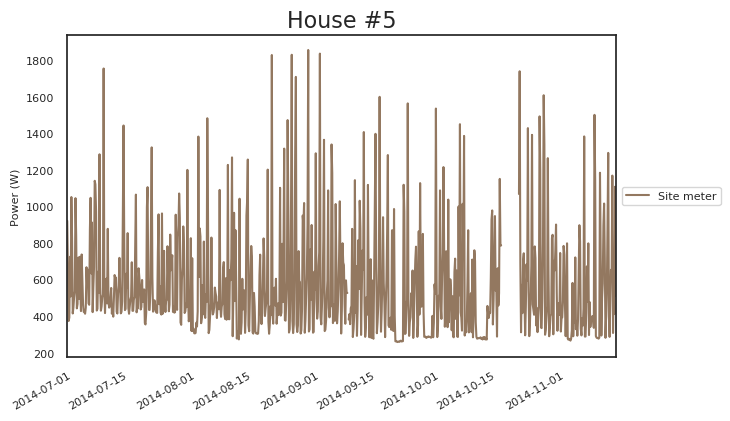

Loading data for meter ElecMeterID(instance=26, building=5, dataset='UK-DALE')     
Done loading data all meters for this chunk.


active       apparent        voltage
count  190272.000000  190250.000000  190250.000000
mean      964.485107     730.168274     246.114546
std       940.455200     525.659180       1.815126
min       161.166656     346.635010     207.855606
25%       550.947754     486.096039     244.853836
50%       732.951416     580.670898     246.119171
75%       964.922119     706.085876     247.427994
max     14975.785156    7799.994629     253.224670

In [77]:
#Creating DF on mains for each house

dataset = DataSet('./Dataset/ukdale.h5')

#test in a small window
dataset.set_window(None, None)

# Define object, change building number accordingly
house_5 = dataset.buildings[5].elec

#test plot
mains_5 = house_5.mains()
ax = mains_5.plot()
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_title('House #5', fontsize=16)
plt.show()


#Passing data to a dataframe and renaming columns
#This house doesnt seem to have voltage data inside mains
mainsdf_5 = next(house_5.load(sample_period=60))
mainsdf_5.columns = ['active', 'apparent','voltage']
#mainsdf_5.head()


mainsdf_5.describe()

#Check column names
#print(mainsdf_5.columns)

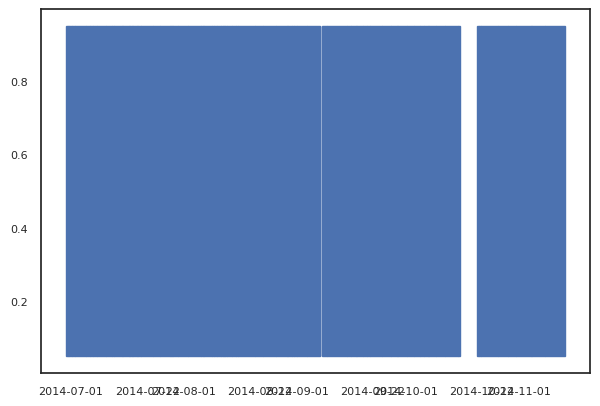

In [78]:
good_sections_5 = mains_5.good_sections()
good_sections_5.plot()

# Define a function to extract good sections for an appliance
# kettle = house_sample['kettle']
# good_sections = kettle.good_sections(full_results=True)

# # specifying full_results=False would give us a simple list of 
# # TimeFrames.  But we want the full GoodSectionsResults object so we can
# # plot the good sections...

# good_sections.plot()